In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_10degree = pd.read_csv('x_10degree_1rev.csv',header=None)

In [5]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [6]:
x = x_10degree[:, 0:15]

In [7]:
x = x.reshape((37*6, n_sensors, 1))

In [8]:
y_10degree = pd.read_csv('y_output(1rev_10deg).csv',header=None)

In [9]:
os.chdir('C:\\Users\\User')

In [10]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [11]:
y = y_10degree.reshape((37*6, 100, 100))

In [12]:
tsr = x_10degree[:, -2]

In [13]:
theta = x_10degree[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(155, 100, 100)


In [16]:
print(y_test.shape)

(67, 100, 100)


In [17]:
print(x_train.shape)

(155, 15, 1)


In [18]:
print(x_test.shape)

(67, 15, 1)


In [19]:
theta_train.shape

(155,)

In [20]:
tsr_train.shape

(155,)

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_time = tf.keras.Input(shape=(2))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [23]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 5)                15        
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 5)                30        
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 5)                30        
 se)                                                             
                                                             

In [24]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train.reshape((-1,1))))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test.reshape((-1,1))))

In [26]:
tsr_theta_train.shape

(155, 2)

In [27]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
4/4 [==============================] - 1s 4ms/step - loss: 80.3606 - rmse: 8.9644
Epoch 2/10000
4/4 [==============================] - 0s 4ms/step - loss: 79.1253 - rmse: 8.8952
Epoch 3/10000
4/4 [==============================] - 0s 4ms/step - loss: 77.9287 - rmse: 8.8277
Epoch 4/10000
4/4 [==============================] - 0s 4ms/step - loss: 76.6392 - rmse: 8.7544
Epoch 5/10000
4/4 [==============================] - 0s 4ms/step - loss: 75.4824 - rmse: 8.6881
Epoch 6/10000
4/4 [==============================] - 0s 4ms/step - loss: 74.3130 - rmse: 8.6205
Epoch 7/10000
4/4 [==============================] - 0s 3ms/step - loss: 73.1557 - rmse: 8.5531
Epoch 8/10000
4/4 [==============================] - 0s 3ms/step - loss: 71.9891 - rmse: 8.4846
Epoch 9/10000
4/4 [==============================] - 0s 4ms/step - loss: 70.8853 - rmse: 8.4193
Epoch 10/10000
4/4 [==============================] - 0s 3ms/step - loss: 69.7630 - rmse: 8.3524
Epoch 11/10000
4/4 [===================

4/4 [==============================] - 0s 4ms/step - loss: 23.9855 - rmse: 4.8975
Epoch 86/10000
4/4 [==============================] - 0s 4ms/step - loss: 23.6894 - rmse: 4.8672
Epoch 87/10000
4/4 [==============================] - 0s 3ms/step - loss: 23.3871 - rmse: 4.8360
Epoch 88/10000
4/4 [==============================] - 0s 4ms/step - loss: 23.0735 - rmse: 4.8035
Epoch 89/10000
4/4 [==============================] - 0s 4ms/step - loss: 22.7836 - rmse: 4.7732
Epoch 90/10000
4/4 [==============================] - 0s 4ms/step - loss: 22.4968 - rmse: 4.7431
Epoch 91/10000
4/4 [==============================] - 0s 4ms/step - loss: 22.2110 - rmse: 4.7129
Epoch 92/10000
4/4 [==============================] - 0s 3ms/step - loss: 21.9228 - rmse: 4.6822
Epoch 93/10000
4/4 [==============================] - 0s 3ms/step - loss: 21.6474 - rmse: 4.6527
Epoch 94/10000
4/4 [==============================] - 0s 3ms/step - loss: 21.3790 - rmse: 4.6237
Epoch 95/10000
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 8.6637 - rmse: 2.9434
Epoch 170/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.5640 - rmse: 2.9264
Epoch 171/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.4640 - rmse: 2.9093
Epoch 172/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.3690 - rmse: 2.8929
Epoch 173/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.2700 - rmse: 2.8758
Epoch 174/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.1758 - rmse: 2.8593
Epoch 175/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.0841 - rmse: 2.8433
Epoch 176/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9904 - rmse: 2.8267
Epoch 177/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8992 - rmse: 2.8105
Epoch 178/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8100 - rmse: 2.7946
Epoch 179/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 3.2916 - rmse: 1.8143
Epoch 254/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2547 - rmse: 1.8041
Epoch 255/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2184 - rmse: 1.7940
Epoch 256/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.1789 - rmse: 1.7829
Epoch 257/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.1419 - rmse: 1.7725
Epoch 258/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.1075 - rmse: 1.7628
Epoch 259/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.0702 - rmse: 1.7522
Epoch 260/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0350 - rmse: 1.7421
Epoch 261/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.9985 - rmse: 1.7316
Epoch 262/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.9647 - rmse: 1.7218
Epoch 263/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 1.2005 - rmse: 1.0957
Epoch 338/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1856 - rmse: 1.0889
Epoch 339/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1708 - rmse: 1.0820
Epoch 340/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1559 - rmse: 1.0751
Epoch 341/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1421 - rmse: 1.0687
Epoch 342/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1274 - rmse: 1.0618
Epoch 343/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1130 - rmse: 1.0550
Epoch 344/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0996 - rmse: 1.0486
Epoch 345/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0858 - rmse: 1.0420
Epoch 346/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0717 - rmse: 1.0352
Epoch 347/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.3977 - rmse: 0.6306
Epoch 422/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3922 - rmse: 0.6262
Epoch 423/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3868 - rmse: 0.6219
Epoch 424/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3816 - rmse: 0.6177
Epoch 425/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3764 - rmse: 0.6135
Epoch 426/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3713 - rmse: 0.6094
Epoch 427/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3661 - rmse: 0.6051
Epoch 428/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3610 - rmse: 0.6009
Epoch 429/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.3561 - rmse: 0.5968
Epoch 430/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.3513 - rmse: 0.5927
Epoch 431/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.1256 - rmse: 0.3544
Epoch 506/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1239 - rmse: 0.3521
Epoch 507/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1224 - rmse: 0.3498
Epoch 508/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1207 - rmse: 0.3475
Epoch 509/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1192 - rmse: 0.3452
Epoch 510/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1176 - rmse: 0.3429
Epoch 511/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1162 - rmse: 0.3409
Epoch 512/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1146 - rmse: 0.3386
Epoch 513/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1132 - rmse: 0.3365
Epoch 514/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.1117 - rmse: 0.3343
Epoch 515/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0506 - rmse: 0.2249
Epoch 590/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0502 - rmse: 0.2240
Epoch 591/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0498 - rmse: 0.2232
Epoch 592/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0494 - rmse: 0.2223
Epoch 593/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0491 - rmse: 0.2215
Epoch 594/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0487 - rmse: 0.2207
Epoch 595/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0483 - rmse: 0.2199
Epoch 596/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0480 - rmse: 0.2191
Epoch 597/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0477 - rmse: 0.2183
Epoch 598/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0473 - rmse: 0.2175
Epoch 599/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0342 - rmse: 0.1849
Epoch 674/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0341 - rmse: 0.1847
Epoch 675/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0340 - rmse: 0.1845
Epoch 676/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0340 - rmse: 0.1843
Epoch 677/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0339 - rmse: 0.1841
Epoch 678/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0338 - rmse: 0.1839
Epoch 679/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0337 - rmse: 0.1837
Epoch 680/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0337 - rmse: 0.1835
Epoch 681/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0336 - rmse: 0.1833
Epoch 682/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0335 - rmse: 0.1831
Epoch 683/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0306 - rmse: 0.1748
Epoch 758/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0305 - rmse: 0.1747
Epoch 759/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0305 - rmse: 0.1747
Epoch 760/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0305 - rmse: 0.1746
Epoch 761/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0305 - rmse: 0.1745
Epoch 762/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0304 - rmse: 0.1744
Epoch 763/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0304 - rmse: 0.1744
Epoch 764/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0304 - rmse: 0.1743
Epoch 765/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0304 - rmse: 0.1742
Epoch 766/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0303 - rmse: 0.1742
Epoch 767/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0289 - rmse: 0.1700
Epoch 842/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0289 - rmse: 0.1700
Epoch 843/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0289 - rmse: 0.1699
Epoch 844/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0289 - rmse: 0.1699
Epoch 845/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0288 - rmse: 0.1698
Epoch 846/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0288 - rmse: 0.1698
Epoch 847/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0288 - rmse: 0.1697
Epoch 848/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0288 - rmse: 0.1697
Epoch 849/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0288 - rmse: 0.1696
Epoch 850/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0288 - rmse: 0.1696
Epoch 851/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0275 - rmse: 0.1660
Epoch 926/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0275 - rmse: 0.1659
Epoch 927/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0275 - rmse: 0.1659
Epoch 928/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0275 - rmse: 0.1658
Epoch 929/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0275 - rmse: 0.1658
Epoch 930/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0275 - rmse: 0.1657
Epoch 931/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0274 - rmse: 0.1657
Epoch 932/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0274 - rmse: 0.1656
Epoch 933/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0274 - rmse: 0.1656
Epoch 934/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0274 - rmse: 0.1655
Epoch 935/10000
4/4 [=========================

4/4 [==============================] - 0s 5ms/step - loss: 0.0263 - rmse: 0.1621
Epoch 1010/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0263 - rmse: 0.1621
Epoch 1011/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0263 - rmse: 0.1620
Epoch 1012/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1620
Epoch 1013/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1619
Epoch 1014/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1619
Epoch 1015/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1619
Epoch 1016/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1618
Epoch 1017/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1618
Epoch 1018/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1617
Epoch 1019/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1586
Epoch 1093/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1585
Epoch 1094/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1585
Epoch 1095/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1585
Epoch 1096/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 1097/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 1098/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 1099/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 1100/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 1101/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 1102/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 1176/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 1177/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 1178/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1551
Epoch 1179/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1551
Epoch 1180/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0240 - rmse: 0.1551
Epoch 1181/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 1182/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 1183/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0240 - rmse: 0.1549
Epoch 1184/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0240 - rmse: 0.1549
Epoch 1185/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 1259/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 1260/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1522
Epoch 1261/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1522
Epoch 1262/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1522
Epoch 1263/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1521
Epoch 1264/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1521
Epoch 1265/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1521
Epoch 1266/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1520
Epoch 1267/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0231 - rmse: 0.1520
Epoch 1268/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - rmse: 0.1500
Epoch 1342/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - rmse: 0.1499
Epoch 1343/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - rmse: 0.1499
Epoch 1344/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - rmse: 0.1499
Epoch 1345/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - rmse: 0.1499
Epoch 1346/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - rmse: 0.1498
Epoch 1347/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0224 - rmse: 0.1498
Epoch 1348/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0224 - rmse: 0.1498
Epoch 1349/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0224 - rmse: 0.1498
Epoch 1350/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0224 - rmse: 0.1497
Epoch 1351/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 1425/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 1426/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 1427/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 1428/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1480
Epoch 1429/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1480
Epoch 1430/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1480
Epoch 1431/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1480
Epoch 1432/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1479
Epoch 1433/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1479
Epoch 1434/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 1508/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1465
Epoch 1509/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 1510/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 1511/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 1512/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 1513/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 1514/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1463
Epoch 1515/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1463
Epoch 1516/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1463
Epoch 1517/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 1591/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 1592/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 1593/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1449
Epoch 1594/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 1595/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 1596/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 1597/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 1598/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 1599/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1447
Epoch 1600/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 1674/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 1675/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 1676/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 1677/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 1678/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 1679/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 1680/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 1681/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 1682/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 1683/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1422
Epoch 1757/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1422
Epoch 1758/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1422
Epoch 1759/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1760/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1761/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1762/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1763/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1764/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1765/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1766/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 1840/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 1841/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 1842/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 1843/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 1844/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.1412
Epoch 1845/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 1846/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 1847/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 1848/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 1849/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 1923/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 1924/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 1925/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 1926/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 1927/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 1928/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 1929/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 1930/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 1931/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 1932/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 2006/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 2007/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 2008/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 2009/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 2010/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 2011/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 2012/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1402
Epoch 2013/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1402
Epoch 2014/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1402
Epoch 2015/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2089/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2090/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2091/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2092/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2093/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2094/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2095/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2096/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2097/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 2098/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2172/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2173/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2174/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2175/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2176/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2177/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2178/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2179/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2180/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 2181/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 2255/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 2256/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 2257/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2258/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 2259/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2260/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 2261/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2262/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2263/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2264/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1395
Epoch 2338/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2339/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1395
Epoch 2340/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2341/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1395
Epoch 2342/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2343/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2344/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2345/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2346/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1395
Epoch 2347/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2421/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2422/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2423/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2424/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 2425/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2426/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2427/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2428/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1395
Epoch 2429/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2430/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2504/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2505/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2506/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2507/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2508/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2509/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2510/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2511/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2512/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2513/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2587/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2588/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2589/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2590/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2591/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2592/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2593/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2594/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2595/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2596/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2670/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2671/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2672/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2673/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2674/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2675/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2676/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2677/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2678/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2679/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2753/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2754/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2755/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2756/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2757/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2758/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2759/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2760/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2761/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2762/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2836/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2837/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2838/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2839/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2840/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2841/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2842/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2843/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2844/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2845/10000
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2919/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2920/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2921/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2922/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2923/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2924/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2925/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 2926/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2927/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 2928/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3002/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3003/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3004/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3005/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3006/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3007/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3008/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3009/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3010/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3011/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3085/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3086/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3087/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3088/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3089/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3090/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3091/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3092/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3093/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3094/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3168/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3169/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3170/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3171/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3172/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3173/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3174/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3175/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3176/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3177/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3251/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3252/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3253/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3254/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3255/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3256/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3257/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3258/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3259/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3260/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3334/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3335/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3336/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3337/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3338/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 3339/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3340/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3341/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3342/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3343/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3417/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3418/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3419/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3420/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3421/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3422/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3423/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3424/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3425/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3426/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3500/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3501/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3502/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3503/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3504/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3505/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3506/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3507/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3508/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3509/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3583/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3584/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3585/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3586/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3587/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3588/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3589/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3590/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3591/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3592/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3666/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3667/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3668/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3669/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3670/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3671/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3672/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3673/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3674/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3675/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3749/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3750/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3751/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3752/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3753/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3754/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3755/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3756/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3757/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3758/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3832/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3833/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3834/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 3835/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3836/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 3837/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3838/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3839/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3840/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3841/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3915/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3916/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3917/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3918/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3919/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3920/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3921/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3922/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3923/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 3924/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3998/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3999/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 4000/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 4001/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4002/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 4003/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4004/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4005/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4006/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 4007/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 4081/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4082/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4083/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4084/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4085/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4086/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4087/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 4088/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4089/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 4090/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 4164/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4165/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4166/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4167/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4168/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4169/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4170/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4171/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4172/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4173/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 4247/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4248/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4249/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4250/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4251/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4252/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4253/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4254/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4255/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4256/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4330/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4331/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4332/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4333/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4334/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4335/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4336/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4337/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4338/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4339/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4413/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4414/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4415/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4416/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4417/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4418/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4419/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4420/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4421/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4422/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4496/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4497/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4498/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4499/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4500/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4501/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4502/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4503/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4504/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4505/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4579/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4580/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4581/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4582/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4583/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4584/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4585/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4586/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4587/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4588/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4662/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1387
Epoch 4663/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4664/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4665/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4666/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4667/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4668/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4669/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4670/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4671/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4745/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1389
Epoch 4746/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4747/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4748/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4749/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4750/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4751/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4752/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4753/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4754/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4828/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4829/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4830/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4831/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4832/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4833/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0193 - rmse: 0.1387
Epoch 4834/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4835/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4836/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4837/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4911/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4912/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4913/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4914/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4915/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4916/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4917/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4918/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4919/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 4920/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4994/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4995/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4996/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4997/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4998/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 4999/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5000/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5001/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5002/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5003/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5077/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5078/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5079/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5080/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5081/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5082/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5083/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5084/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5085/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5086/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1386
Epoch 5160/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5161/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5162/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5163/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 5164/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5165/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5166/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5167/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5168/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5169/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5243/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5244/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 5245/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 5246/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 5247/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 5248/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5249/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 5250/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5251/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5252/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5326/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5327/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5328/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5329/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5330/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5331/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5332/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 5333/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5334/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5335/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5409/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5410/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5411/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5412/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5413/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5414/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5415/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5416/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5417/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5418/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5492/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5493/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5494/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5495/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5496/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5497/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 5498/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5499/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5500/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5501/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5575/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5576/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5577/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5578/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5579/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5580/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5581/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5582/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5583/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5584/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5658/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5659/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5660/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5661/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5662/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5663/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 5664/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5665/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5666/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5667/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5741/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5742/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 5743/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5744/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 5745/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 5746/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5747/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 5748/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5749/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 5750/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5824/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5825/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5826/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5827/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5828/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5829/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5830/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5831/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5832/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 5833/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5907/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 5908/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5909/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5910/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5911/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5912/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5913/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5914/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5915/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5916/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5990/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5991/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5992/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5993/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5994/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5995/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5996/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5997/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 5998/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 5999/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 6073/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 6074/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 6075/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6076/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6077/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6078/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6079/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6080/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6081/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6082/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6156/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 6157/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6158/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6159/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6160/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6161/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 6162/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6163/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6164/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 6165/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1377
Epoch 6239/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 6240/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 6241/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6242/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6243/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6244/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6245/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6246/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6247/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6248/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6322/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 6323/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6324/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6325/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6326/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6327/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6328/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6329/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6330/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6331/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6405/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6406/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6407/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6408/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6409/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6410/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6411/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6412/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 6413/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6414/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6488/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6489/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6490/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6491/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6492/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6493/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6494/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6495/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6496/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6497/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6571/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6572/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6573/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6574/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6575/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6576/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6577/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6578/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6579/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6580/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6654/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 6655/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6656/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6657/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1375
Epoch 6658/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6659/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6660/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 6661/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 6662/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 6663/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 6737/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 6738/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 6739/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 6740/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 6741/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 6742/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 6743/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 6744/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 6745/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 6746/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6820/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6821/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6822/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6823/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6824/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6825/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6826/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 6827/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6828/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 6829/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6903/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6904/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6905/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6906/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6907/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6908/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6909/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6910/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6911/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6912/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6986/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6987/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 6988/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6989/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6990/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6991/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 6992/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6993/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 6994/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 6995/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 7069/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 7070/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 7071/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7072/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7073/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7074/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 7075/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7076/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 7077/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7078/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7152/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7153/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7154/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 7155/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7156/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7157/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7158/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7159/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1370
Epoch 7160/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7161/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7235/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7236/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7237/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7238/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7239/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7240/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7241/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7242/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7243/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7244/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7318/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7319/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7320/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7321/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7322/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7323/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7324/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7325/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7326/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7327/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7401/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7402/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7403/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7404/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7405/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7406/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7407/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7408/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7409/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7410/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7484/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7485/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7486/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7487/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7488/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7489/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7490/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7491/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7492/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7493/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7567/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7568/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7569/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7570/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7571/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7572/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7573/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7574/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 7575/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7576/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7650/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7651/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7652/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7653/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7654/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7655/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7656/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7657/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7658/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7659/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7733/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7734/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7735/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7736/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7737/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7738/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7739/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7740/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7741/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7742/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7816/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7817/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7818/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1367
Epoch 7819/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7820/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 7821/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7822/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 7823/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 7824/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 7825/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 7899/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7900/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 7901/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 7902/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7903/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 7904/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 7905/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 7906/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 7907/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 7908/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 7982/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 7983/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 7984/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 7985/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 7986/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 7987/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 7988/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 7989/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 7990/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 7991/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8065/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 8066/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 8067/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8068/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8069/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8070/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8071/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8072/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8073/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 8074/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8148/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8149/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8150/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8151/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8152/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8153/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8154/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8155/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 8156/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 8157/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8231/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8232/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8233/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8234/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8235/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8236/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 8237/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 8238/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 8239/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 8240/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8314/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8315/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8316/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 8317/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8318/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 8319/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8320/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8321/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8322/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8323/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8397/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 8398/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8399/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 8400/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 8401/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8402/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8403/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8404/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8405/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8406/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 8480/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8481/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1355
Epoch 8482/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 8483/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 8484/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 8485/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 8486/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 8487/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 8488/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8489/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 8563/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 8564/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1355
Epoch 8565/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 8566/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 8567/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 8568/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 8569/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8570/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 8571/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 8572/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1351
Epoch 8646/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 8647/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1351
Epoch 8648/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 8649/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8650/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 8651/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1351
Epoch 8652/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1351
Epoch 8653/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1351
Epoch 8654/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1351
Epoch 8655/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8729/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8730/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 8731/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1351
Epoch 8732/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 8733/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8734/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8735/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8736/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 8737/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1351
Epoch 8738/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8812/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8813/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8814/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8815/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8816/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8817/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8818/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8819/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8820/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 8821/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1357
Epoch 8895/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 8896/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 8897/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1351
Epoch 8898/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 8899/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 8900/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 8901/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 8902/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 8903/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 8904/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 8978/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 8979/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 8980/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 8981/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8982/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 8983/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 8984/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 8985/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8986/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 8987/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9061/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 9062/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 9063/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 9064/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9065/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 9066/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9067/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 9068/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9069/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 9070/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9144/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9145/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9146/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9147/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9148/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 9149/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9150/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9151/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9152/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9153/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9227/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 9228/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 9229/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 9230/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 9231/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 9232/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9233/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9234/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 9235/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9236/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9310/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9311/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9312/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 9313/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9314/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9315/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9316/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9317/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 9318/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 9319/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 9393/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9394/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9395/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9396/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 9397/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 9398/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9399/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9400/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9401/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1342
Epoch 9402/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 9476/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9477/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9478/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9479/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 9480/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9481/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1340
Epoch 9482/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9483/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9484/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 9485/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9559/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1340
Epoch 9560/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9561/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9562/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9563/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9564/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9565/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9566/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9567/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9568/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 9642/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9643/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9644/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9645/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 9646/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 9647/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 9648/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9649/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9650/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9651/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9725/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9726/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 9727/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 9728/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9729/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 9730/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9731/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 9732/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9733/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9734/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 9808/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9809/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 9810/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9811/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9812/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 9813/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 9814/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 9815/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 9816/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 9817/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 9891/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 9892/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1336
Epoch 9893/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 9894/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 9895/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 9896/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 9897/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 9898/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 9899/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 9900/10000
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 9974/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 9975/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 9976/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 9977/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 9978/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 9979/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 9980/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 9981/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 9982/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 9983/10000
4/4 [===============

In [28]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:03:35.362512


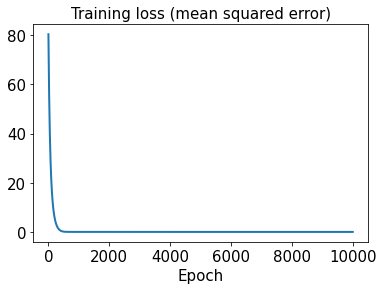

In [29]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

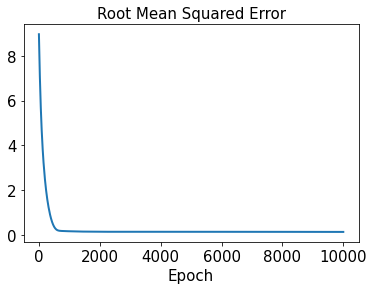

In [30]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [31]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [32]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [33]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.67015076


In [34]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.68258435


In [35]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [36]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

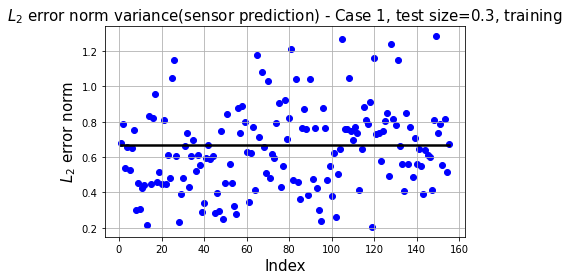

In [37]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

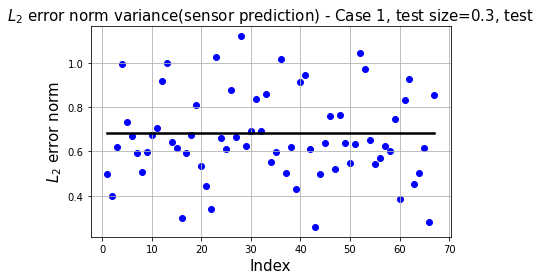

In [38]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [40]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [41]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [42]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
5/5 [==============================] - 0s 30ms/step - loss: 0.0110 - rmse: 0.1039
Epoch 2/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1037
Epoch 3/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1033
Epoch 4/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 5/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1025
Epoch 6/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1019
Epoch 7/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.1011
Epoch 8/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0998
Epoch 9/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0979
Epoch 10/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0092 - rmse: 0.0950
Epoch 11/10000
5/5 [============================

5/5 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0593
Epoch 87/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0590
Epoch 88/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 89/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0583
Epoch 90/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0580
Epoch 91/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 92/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0573
Epoch 93/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 94/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0567
Epoch 95/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 96/10000
5/5 [==============================] - 0

5/5 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0363
Epoch 171/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 172/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 173/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0355
Epoch 174/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0353
Epoch 175/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0351
Epoch 176/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0349
Epoch 177/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0347
Epoch 178/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0345
Epoch 179/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 180/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 7.6004e-04 - rmse: 0.0244
Epoch 253/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.5539e-04 - rmse: 0.0243
Epoch 254/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4871e-04 - rmse: 0.0241
Epoch 255/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.4344e-04 - rmse: 0.0240
Epoch 256/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.3787e-04 - rmse: 0.0239
Epoch 257/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.3531e-04 - rmse: 0.0239
Epoch 258/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.3127e-04 - rmse: 0.0238
Epoch 259/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.2913e-04 - rmse: 0.0237
Epoch 260/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2522e-04 - rmse: 0.0237
Epoch 261/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2102e-04 - rmse: 0.0236
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 4.8619e-04 - rmse: 0.0179
Epoch 334/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8411e-04 - rmse: 0.0179
Epoch 335/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8217e-04 - rmse: 0.0178
Epoch 336/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8023e-04 - rmse: 0.0178
Epoch 337/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7662e-04 - rmse: 0.0177
Epoch 338/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7447e-04 - rmse: 0.0176
Epoch 339/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.7238e-04 - rmse: 0.0175
Epoch 340/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.7204e-04 - rmse: 0.0175
Epoch 341/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6845e-04 - rmse: 0.0174
Epoch 342/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6779e-04 - rmse: 0.0174
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 3.6456e-04 - rmse: 0.0142
Epoch 415/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6302e-04 - rmse: 0.0142
Epoch 416/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6383e-04 - rmse: 0.0142
Epoch 417/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6336e-04 - rmse: 0.0142
Epoch 418/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6109e-04 - rmse: 0.0141
Epoch 419/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5972e-04 - rmse: 0.0140
Epoch 420/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5864e-04 - rmse: 0.0140
Epoch 421/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5904e-04 - rmse: 0.0140
Epoch 422/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5737e-04 - rmse: 0.0140
Epoch 423/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5750e-04 - rmse: 0.0140
Epoch 

5/5 [==============================] - 0s 5ms/step - loss: 3.0714e-04 - rmse: 0.0121
Epoch 496/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0656e-04 - rmse: 0.0121
Epoch 497/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0574e-04 - rmse: 0.0121
Epoch 498/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0547e-04 - rmse: 0.0121
Epoch 499/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0569e-04 - rmse: 0.0121
Epoch 500/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0442e-04 - rmse: 0.0120
Epoch 501/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0404e-04 - rmse: 0.0120
Epoch 502/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0429e-04 - rmse: 0.0120
Epoch 503/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0445e-04 - rmse: 0.0121
Epoch 504/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0407e-04 - rmse: 0.0120
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 2.7476e-04 - rmse: 0.0109
Epoch 577/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7453e-04 - rmse: 0.0109
Epoch 578/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7429e-04 - rmse: 0.0109
Epoch 579/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7350e-04 - rmse: 0.0108
Epoch 580/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7381e-04 - rmse: 0.0109
Epoch 581/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.7242e-04 - rmse: 0.0108
Epoch 582/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.7242e-04 - rmse: 0.0108
Epoch 583/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7198e-04 - rmse: 0.0108
Epoch 584/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.7184e-04 - rmse: 0.0108
Epoch 585/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.7140e-04 - rmse: 0.0108
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 2.5134e-04 - rmse: 0.0099
Epoch 658/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.5051e-04 - rmse: 0.0099
Epoch 659/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5155e-04 - rmse: 0.0100
Epoch 660/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.5047e-04 - rmse: 0.0099
Epoch 661/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.5002e-04 - rmse: 0.0099
Epoch 662/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5007e-04 - rmse: 0.0099
Epoch 663/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.4981e-04 - rmse: 0.0099
Epoch 664/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.4907e-04 - rmse: 0.0098
Epoch 665/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4913e-04 - rmse: 0.0099
Epoch 666/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4929e-04 - rmse: 0.0099
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 2.3102e-04 - rmse: 0.0091
Epoch 739/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.3119e-04 - rmse: 0.0091
Epoch 740/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.3091e-04 - rmse: 0.0091
Epoch 741/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.3136e-04 - rmse: 0.0091
Epoch 742/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.3056e-04 - rmse: 0.0091
Epoch 743/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.3047e-04 - rmse: 0.0091
Epoch 744/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.3018e-04 - rmse: 0.0090
Epoch 745/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.3030e-04 - rmse: 0.0091
Epoch 746/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.2957e-04 - rmse: 0.0090
Epoch 747/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2976e-04 - rmse: 0.0090
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 2.1413e-04 - rmse: 0.0083
Epoch 820/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1450e-04 - rmse: 0.0083
Epoch 821/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1444e-04 - rmse: 0.0083
Epoch 822/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1375e-04 - rmse: 0.0083
Epoch 823/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1398e-04 - rmse: 0.0083
Epoch 824/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1348e-04 - rmse: 0.0083
Epoch 825/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1321e-04 - rmse: 0.0083
Epoch 826/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1268e-04 - rmse: 0.0083
Epoch 827/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1266e-04 - rmse: 0.0083
Epoch 828/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1230e-04 - rmse: 0.0082
Epoch 

5/5 [==============================] - 0s 5ms/step - loss: 1.9996e-04 - rmse: 0.0077
Epoch 901/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0059e-04 - rmse: 0.0077
Epoch 902/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0021e-04 - rmse: 0.0077
Epoch 903/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0005e-04 - rmse: 0.0077
Epoch 904/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.9956e-04 - rmse: 0.0077
Epoch 905/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.9937e-04 - rmse: 0.0076
Epoch 906/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.9867e-04 - rmse: 0.0076
Epoch 907/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.9887e-04 - rmse: 0.0076
Epoch 908/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9838e-04 - rmse: 0.0076
Epoch 909/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.9824e-04 - rmse: 0.0076
Epoch 

5/5 [==============================] - 0s 5ms/step - loss: 1.8891e-04 - rmse: 0.0072
Epoch 982/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.8874e-04 - rmse: 0.0072
Epoch 983/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8828e-04 - rmse: 0.0071
Epoch 984/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.8811e-04 - rmse: 0.0071
Epoch 985/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.8774e-04 - rmse: 0.0071
Epoch 986/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8761e-04 - rmse: 0.0071
Epoch 987/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8743e-04 - rmse: 0.0071
Epoch 988/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.8716e-04 - rmse: 0.0071
Epoch 989/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8682e-04 - rmse: 0.0071
Epoch 990/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8655e-04 - rmse: 0.0070
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 1.7754e-04 - rmse: 0.0066
Epoch 1062/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.7737e-04 - rmse: 0.0066
Epoch 1063/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7691e-04 - rmse: 0.0066
Epoch 1064/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7685e-04 - rmse: 0.0066
Epoch 1065/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7693e-04 - rmse: 0.0066
Epoch 1066/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.7691e-04 - rmse: 0.0066
Epoch 1067/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7673e-04 - rmse: 0.0066
Epoch 1068/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7671e-04 - rmse: 0.0066
Epoch 1069/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.7678e-04 - rmse: 0.0066
Epoch 1070/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.7676e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.6828e-04 - rmse: 0.0062
Epoch 1142/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6846e-04 - rmse: 0.0062
Epoch 1143/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6827e-04 - rmse: 0.0062
Epoch 1144/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6798e-04 - rmse: 0.0062
Epoch 1145/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6797e-04 - rmse: 0.0062
Epoch 1146/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6809e-04 - rmse: 0.0062
Epoch 1147/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6758e-04 - rmse: 0.0062
Epoch 1148/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6790e-04 - rmse: 0.0062
Epoch 1149/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6770e-04 - rmse: 0.0062
Epoch 1150/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6728e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.6034e-04 - rmse: 0.0058
Epoch 1222/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6000e-04 - rmse: 0.0058
Epoch 1223/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6003e-04 - rmse: 0.0058
Epoch 1224/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6016e-04 - rmse: 0.0058
Epoch 1225/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5996e-04 - rmse: 0.0058
Epoch 1226/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5987e-04 - rmse: 0.0058
Epoch 1227/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5996e-04 - rmse: 0.0058
Epoch 1228/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5965e-04 - rmse: 0.0058
Epoch 1229/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5978e-04 - rmse: 0.0058
Epoch 1230/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5943e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.5260e-04 - rmse: 0.0055
Epoch 1302/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5269e-04 - rmse: 0.0055
Epoch 1303/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5255e-04 - rmse: 0.0055
Epoch 1304/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5272e-04 - rmse: 0.0055
Epoch 1305/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5246e-04 - rmse: 0.0055
Epoch 1306/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5236e-04 - rmse: 0.0055
Epoch 1307/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5224e-04 - rmse: 0.0055
Epoch 1308/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5217e-04 - rmse: 0.0055
Epoch 1309/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5231e-04 - rmse: 0.0055
Epoch 1310/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5232e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.4631e-04 - rmse: 0.0052
Epoch 1382/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4641e-04 - rmse: 0.0052
Epoch 1383/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4624e-04 - rmse: 0.0052
Epoch 1384/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.4592e-04 - rmse: 0.0052
Epoch 1385/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4588e-04 - rmse: 0.0052
Epoch 1386/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4598e-04 - rmse: 0.0052
Epoch 1387/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.4592e-04 - rmse: 0.0052
Epoch 1388/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.4576e-04 - rmse: 0.0052
Epoch 1389/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4565e-04 - rmse: 0.0052
Epoch 1390/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4571e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.4048e-04 - rmse: 0.0050
Epoch 1462/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.4006e-04 - rmse: 0.0049
Epoch 1463/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4013e-04 - rmse: 0.0049
Epoch 1464/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3980e-04 - rmse: 0.0049
Epoch 1465/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3993e-04 - rmse: 0.0049
Epoch 1466/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4001e-04 - rmse: 0.0049
Epoch 1467/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3991e-04 - rmse: 0.0049
Epoch 1468/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3987e-04 - rmse: 0.0049
Epoch 1469/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3983e-04 - rmse: 0.0049
Epoch 1470/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.4004e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.3505e-04 - rmse: 0.0047
Epoch 1542/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3491e-04 - rmse: 0.0047
Epoch 1543/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3493e-04 - rmse: 0.0047
Epoch 1544/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.3517e-04 - rmse: 0.0048
Epoch 1545/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3490e-04 - rmse: 0.0047
Epoch 1546/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3518e-04 - rmse: 0.0048
Epoch 1547/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3512e-04 - rmse: 0.0048
Epoch 1548/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3505e-04 - rmse: 0.0048
Epoch 1549/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3498e-04 - rmse: 0.0048
Epoch 1550/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3460e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.3003e-04 - rmse: 0.0045
Epoch 1622/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3001e-04 - rmse: 0.0045
Epoch 1623/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.3003e-04 - rmse: 0.0045
Epoch 1624/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3024e-04 - rmse: 0.0046
Epoch 1625/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3018e-04 - rmse: 0.0046
Epoch 1626/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3023e-04 - rmse: 0.0046
Epoch 1627/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2996e-04 - rmse: 0.0045
Epoch 1628/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3017e-04 - rmse: 0.0046
Epoch 1629/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3008e-04 - rmse: 0.0046
Epoch 1630/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3083e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2588e-04 - rmse: 0.0044
Epoch 1702/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2560e-04 - rmse: 0.0044
Epoch 1703/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2544e-04 - rmse: 0.0043
Epoch 1704/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2550e-04 - rmse: 0.0044
Epoch 1705/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2526e-04 - rmse: 0.0043
Epoch 1706/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2524e-04 - rmse: 0.0043
Epoch 1707/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2517e-04 - rmse: 0.0043
Epoch 1708/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2483e-04 - rmse: 0.0043
Epoch 1709/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2485e-04 - rmse: 0.0043
Epoch 1710/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2492e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.2162e-04 - rmse: 0.0042
Epoch 1782/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2136e-04 - rmse: 0.0042
Epoch 1783/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2118e-04 - rmse: 0.0042
Epoch 1784/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2101e-04 - rmse: 0.0042
Epoch 1785/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2103e-04 - rmse: 0.0042
Epoch 1786/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2094e-04 - rmse: 0.0042
Epoch 1787/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2089e-04 - rmse: 0.0042
Epoch 1788/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2056e-04 - rmse: 0.0041
Epoch 1789/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2075e-04 - rmse: 0.0042
Epoch 1790/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2081e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.1725e-04 - rmse: 0.0040
Epoch 1862/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1693e-04 - rmse: 0.0040
Epoch 1863/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1692e-04 - rmse: 0.0040
Epoch 1864/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1679e-04 - rmse: 0.0040
Epoch 1865/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1674e-04 - rmse: 0.0040
Epoch 1866/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1663e-04 - rmse: 0.0040
Epoch 1867/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1665e-04 - rmse: 0.0040
Epoch 1868/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1647e-04 - rmse: 0.0040
Epoch 1869/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1652e-04 - rmse: 0.0040
Epoch 1870/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1669e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1349e-04 - rmse: 0.0039
Epoch 1942/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1339e-04 - rmse: 0.0039
Epoch 1943/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1325e-04 - rmse: 0.0039
Epoch 1944/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1338e-04 - rmse: 0.0039
Epoch 1945/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1332e-04 - rmse: 0.0039
Epoch 1946/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1322e-04 - rmse: 0.0039
Epoch 1947/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1342e-04 - rmse: 0.0039
Epoch 1948/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1333e-04 - rmse: 0.0039
Epoch 1949/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1303e-04 - rmse: 0.0039
Epoch 1950/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1293e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.1000e-04 - rmse: 0.0038
Epoch 2022/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1026e-04 - rmse: 0.0038
Epoch 2023/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1061e-04 - rmse: 0.0039
Epoch 2024/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1040e-04 - rmse: 0.0038
Epoch 2025/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1009e-04 - rmse: 0.0038
Epoch 2026/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0997e-04 - rmse: 0.0038
Epoch 2027/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0978e-04 - rmse: 0.0038
Epoch 2028/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0956e-04 - rmse: 0.0037
Epoch 2029/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0922e-04 - rmse: 0.0037
Epoch 2030/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0936e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0632e-04 - rmse: 0.0036
Epoch 2102/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0622e-04 - rmse: 0.0036
Epoch 2103/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0629e-04 - rmse: 0.0036
Epoch 2104/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0644e-04 - rmse: 0.0036
Epoch 2105/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0656e-04 - rmse: 0.0037
Epoch 2106/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0650e-04 - rmse: 0.0036
Epoch 2107/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0657e-04 - rmse: 0.0037
Epoch 2108/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0657e-04 - rmse: 0.0037
Epoch 2109/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0653e-04 - rmse: 0.0037
Epoch 2110/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0639e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0351e-04 - rmse: 0.0035
Epoch 2182/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0337e-04 - rmse: 0.0035
Epoch 2183/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0334e-04 - rmse: 0.0035
Epoch 2184/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0333e-04 - rmse: 0.0035
Epoch 2185/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0314e-04 - rmse: 0.0035
Epoch 2186/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0311e-04 - rmse: 0.0035
Epoch 2187/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0302e-04 - rmse: 0.0035
Epoch 2188/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0291e-04 - rmse: 0.0035
Epoch 2189/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0294e-04 - rmse: 0.0035
Epoch 2190/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0279e-04 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 1.0056e-04 - rmse: 0.0034
Epoch 2262/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0066e-04 - rmse: 0.0035
Epoch 2263/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0035e-04 - rmse: 0.0034
Epoch 2264/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0032e-04 - rmse: 0.0034
Epoch 2265/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0040e-04 - rmse: 0.0034
Epoch 2266/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0035e-04 - rmse: 0.0034
Epoch 2267/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0033e-04 - rmse: 0.0034
Epoch 2268/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0015e-04 - rmse: 0.0034
Epoch 2269/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.9910e-05 - rmse: 0.0034
Epoch 2270/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.9971e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.7442e-05 - rmse: 0.0033
Epoch 2342/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7482e-05 - rmse: 0.0033
Epoch 2343/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7323e-05 - rmse: 0.0033
Epoch 2344/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7332e-05 - rmse: 0.0033
Epoch 2345/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7251e-05 - rmse: 0.0033
Epoch 2346/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7389e-05 - rmse: 0.0033
Epoch 2347/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7218e-05 - rmse: 0.0033
Epoch 2348/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7278e-05 - rmse: 0.0033
Epoch 2349/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7393e-05 - rmse: 0.0033
Epoch 2350/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7384e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.4988e-05 - rmse: 0.0033
Epoch 2422/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.4736e-05 - rmse: 0.0032
Epoch 2423/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.4714e-05 - rmse: 0.0032
Epoch 2424/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4642e-05 - rmse: 0.0032
Epoch 2425/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4603e-05 - rmse: 0.0032
Epoch 2426/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4503e-05 - rmse: 0.0032
Epoch 2427/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4251e-05 - rmse: 0.0032
Epoch 2428/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.4303e-05 - rmse: 0.0032
Epoch 2429/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4291e-05 - rmse: 0.0032
Epoch 2430/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.4400e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.2334e-05 - rmse: 0.0032
Epoch 2502/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.2090e-05 - rmse: 0.0031
Epoch 2503/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2042e-05 - rmse: 0.0031
Epoch 2504/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.2267e-05 - rmse: 0.0032
Epoch 2505/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.2398e-05 - rmse: 0.0032
Epoch 2506/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2190e-05 - rmse: 0.0032
Epoch 2507/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2101e-05 - rmse: 0.0032
Epoch 2508/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1849e-05 - rmse: 0.0031
Epoch 2509/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2003e-05 - rmse: 0.0031
Epoch 2510/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2074e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.9690e-05 - rmse: 0.0031
Epoch 2582/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9820e-05 - rmse: 0.0031
Epoch 2583/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9620e-05 - rmse: 0.0030
Epoch 2584/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.9633e-05 - rmse: 0.0031
Epoch 2585/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9827e-05 - rmse: 0.0031
Epoch 2586/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.9635e-05 - rmse: 0.0031
Epoch 2587/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9626e-05 - rmse: 0.0031
Epoch 2588/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.9518e-05 - rmse: 0.0030
Epoch 2589/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9306e-05 - rmse: 0.0030
Epoch 2590/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.9259e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.7673e-05 - rmse: 0.0030
Epoch 2662/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7471e-05 - rmse: 0.0030
Epoch 2663/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7536e-05 - rmse: 0.0030
Epoch 2664/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.7387e-05 - rmse: 0.0030
Epoch 2665/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.7580e-05 - rmse: 0.0030
Epoch 2666/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.7449e-05 - rmse: 0.0030
Epoch 2667/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7416e-05 - rmse: 0.0030
Epoch 2668/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.7369e-05 - rmse: 0.0030
Epoch 2669/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7149e-05 - rmse: 0.0030
Epoch 2670/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7202e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 8.5319e-05 - rmse: 0.0029
Epoch 2742/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5162e-05 - rmse: 0.0029
Epoch 2743/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.5135e-05 - rmse: 0.0029
Epoch 2744/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.5088e-05 - rmse: 0.0029
Epoch 2745/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.5103e-05 - rmse: 0.0029
Epoch 2746/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5061e-05 - rmse: 0.0029
Epoch 2747/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.5298e-05 - rmse: 0.0029
Epoch 2748/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.5141e-05 - rmse: 0.0029
Epoch 2749/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.5196e-05 - rmse: 0.0029
Epoch 2750/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5202e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.2883e-05 - rmse: 0.0028
Epoch 2822/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.2837e-05 - rmse: 0.0028
Epoch 2823/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.3001e-05 - rmse: 0.0028
Epoch 2824/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3103e-05 - rmse: 0.0029
Epoch 2825/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3068e-05 - rmse: 0.0029
Epoch 2826/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.3216e-05 - rmse: 0.0029
Epoch 2827/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3204e-05 - rmse: 0.0029
Epoch 2828/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.3276e-05 - rmse: 0.0029
Epoch 2829/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3063e-05 - rmse: 0.0029
Epoch 2830/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.2989e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.1551e-05 - rmse: 0.0029
Epoch 2902/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.1396e-05 - rmse: 0.0028
Epoch 2903/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1133e-05 - rmse: 0.0028
Epoch 2904/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1259e-05 - rmse: 0.0028
Epoch 2905/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1178e-05 - rmse: 0.0028
Epoch 2906/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0879e-05 - rmse: 0.0028
Epoch 2907/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0903e-05 - rmse: 0.0028
Epoch 2908/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.0948e-05 - rmse: 0.0028
Epoch 2909/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1114e-05 - rmse: 0.0028
Epoch 2910/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0933e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 7.9241e-05 - rmse: 0.0027
Epoch 2982/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.9251e-05 - rmse: 0.0027
Epoch 2983/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9122e-05 - rmse: 0.0027
Epoch 2984/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.8981e-05 - rmse: 0.0027
Epoch 2985/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9108e-05 - rmse: 0.0027
Epoch 2986/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.9143e-05 - rmse: 0.0027
Epoch 2987/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.9350e-05 - rmse: 0.0028
Epoch 2988/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9466e-05 - rmse: 0.0028
Epoch 2989/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9245e-05 - rmse: 0.0028
Epoch 2990/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9266e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 7.7497e-05 - rmse: 0.0027
Epoch 3062/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7372e-05 - rmse: 0.0027
Epoch 3063/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.7262e-05 - rmse: 0.0027
Epoch 3064/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7349e-05 - rmse: 0.0027
Epoch 3065/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.7267e-05 - rmse: 0.0027
Epoch 3066/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7354e-05 - rmse: 0.0027
Epoch 3067/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7111e-05 - rmse: 0.0026
Epoch 3068/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.7326e-05 - rmse: 0.0027
Epoch 3069/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7485e-05 - rmse: 0.0027
Epoch 3070/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.7300e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.5627e-05 - rmse: 0.0026
Epoch 3142/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5587e-05 - rmse: 0.0026
Epoch 3143/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5458e-05 - rmse: 0.0026
Epoch 3144/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5560e-05 - rmse: 0.0026
Epoch 3145/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5629e-05 - rmse: 0.0026
Epoch 3146/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5648e-05 - rmse: 0.0026
Epoch 3147/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.5547e-05 - rmse: 0.0026
Epoch 3148/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.5576e-05 - rmse: 0.0026
Epoch 3149/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5572e-05 - rmse: 0.0026
Epoch 3150/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.5546e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.4188e-05 - rmse: 0.0026
Epoch 3222/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.4018e-05 - rmse: 0.0026
Epoch 3223/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.4234e-05 - rmse: 0.0026
Epoch 3224/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4271e-05 - rmse: 0.0026
Epoch 3225/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.4097e-05 - rmse: 0.0026
Epoch 3226/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.4166e-05 - rmse: 0.0026
Epoch 3227/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4065e-05 - rmse: 0.0026
Epoch 3228/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.4008e-05 - rmse: 0.0026
Epoch 3229/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.3913e-05 - rmse: 0.0026
Epoch 3230/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.3906e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.2612e-05 - rmse: 0.0026
Epoch 3302/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2508e-05 - rmse: 0.0026
Epoch 3303/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2474e-05 - rmse: 0.0025
Epoch 3304/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2325e-05 - rmse: 0.0025
Epoch 3305/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2300e-05 - rmse: 0.0025
Epoch 3306/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.2273e-05 - rmse: 0.0025
Epoch 3307/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.2204e-05 - rmse: 0.0025
Epoch 3308/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.2333e-05 - rmse: 0.0025
Epoch 3309/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2313e-05 - rmse: 0.0025
Epoch 3310/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.2372e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.1132e-05 - rmse: 0.0025
Epoch 3382/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1102e-05 - rmse: 0.0025
Epoch 3383/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0975e-05 - rmse: 0.0025
Epoch 3384/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0849e-05 - rmse: 0.0025
Epoch 3385/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0816e-05 - rmse: 0.0025
Epoch 3386/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.0716e-05 - rmse: 0.0025
Epoch 3387/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0862e-05 - rmse: 0.0025
Epoch 3388/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0886e-05 - rmse: 0.0025
Epoch 3389/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0852e-05 - rmse: 0.0025
Epoch 3390/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0728e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.9634e-05 - rmse: 0.0025
Epoch 3462/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9619e-05 - rmse: 0.0025
Epoch 3463/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.9639e-05 - rmse: 0.0025
Epoch 3464/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9646e-05 - rmse: 0.0025
Epoch 3465/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9850e-05 - rmse: 0.0025
Epoch 3466/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.9653e-05 - rmse: 0.0025
Epoch 3467/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9418e-05 - rmse: 0.0025
Epoch 3468/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.9313e-05 - rmse: 0.0025
Epoch 3469/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9525e-05 - rmse: 0.0025
Epoch 3470/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.9598e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 6.8162e-05 - rmse: 0.0024
Epoch 3542/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8516e-05 - rmse: 0.0025
Epoch 3543/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8443e-05 - rmse: 0.0025
Epoch 3544/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8320e-05 - rmse: 0.0025
Epoch 3545/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.8246e-05 - rmse: 0.0025
Epoch 3546/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.8353e-05 - rmse: 0.0025
Epoch 3547/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8299e-05 - rmse: 0.0025
Epoch 3548/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8120e-05 - rmse: 0.0025
Epoch 3549/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.7988e-05 - rmse: 0.0024
Epoch 3550/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7937e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.7179e-05 - rmse: 0.0025
Epoch 3622/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7358e-05 - rmse: 0.0025
Epoch 3623/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.7364e-05 - rmse: 0.0025
Epoch 3624/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7267e-05 - rmse: 0.0025
Epoch 3625/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7030e-05 - rmse: 0.0025
Epoch 3626/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7062e-05 - rmse: 0.0025
Epoch 3627/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6934e-05 - rmse: 0.0024
Epoch 3628/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6720e-05 - rmse: 0.0024
Epoch 3629/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6623e-05 - rmse: 0.0024
Epoch 3630/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.6721e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.6276e-05 - rmse: 0.0025
Epoch 3702/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6226e-05 - rmse: 0.0025
Epoch 3703/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5778e-05 - rmse: 0.0024
Epoch 3704/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.5750e-05 - rmse: 0.0024
Epoch 3705/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5732e-05 - rmse: 0.0024
Epoch 3706/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5725e-05 - rmse: 0.0024
Epoch 3707/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5853e-05 - rmse: 0.0025
Epoch 3708/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6005e-05 - rmse: 0.0025
Epoch 3709/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.6338e-05 - rmse: 0.0026
Epoch 3710/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6345e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.4377e-05 - rmse: 0.0023
Epoch 3782/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.4447e-05 - rmse: 0.0024
Epoch 3783/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.4332e-05 - rmse: 0.0023
Epoch 3784/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.4206e-05 - rmse: 0.0023
Epoch 3785/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.4263e-05 - rmse: 0.0023
Epoch 3786/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.4297e-05 - rmse: 0.0023
Epoch 3787/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.4418e-05 - rmse: 0.0024
Epoch 3788/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.4323e-05 - rmse: 0.0024
Epoch 3789/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.4168e-05 - rmse: 0.0023
Epoch 3790/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.4136e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 6.3012e-05 - rmse: 0.0023
Epoch 3862/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.2982e-05 - rmse: 0.0023
Epoch 3863/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3082e-05 - rmse: 0.0023
Epoch 3864/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.3059e-05 - rmse: 0.0023
Epoch 3865/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2914e-05 - rmse: 0.0023
Epoch 3866/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2901e-05 - rmse: 0.0023
Epoch 3867/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3077e-05 - rmse: 0.0023
Epoch 3868/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3147e-05 - rmse: 0.0023
Epoch 3869/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3285e-05 - rmse: 0.0024
Epoch 3870/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.3425e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.2022e-05 - rmse: 0.0023
Epoch 3942/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2077e-05 - rmse: 0.0023
Epoch 3943/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2113e-05 - rmse: 0.0023
Epoch 3944/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2288e-05 - rmse: 0.0023
Epoch 3945/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2208e-05 - rmse: 0.0023
Epoch 3946/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2386e-05 - rmse: 0.0024
Epoch 3947/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2032e-05 - rmse: 0.0023
Epoch 3948/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.1996e-05 - rmse: 0.0023
Epoch 3949/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1876e-05 - rmse: 0.0023
Epoch 3950/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.1902e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.1168e-05 - rmse: 0.0023
Epoch 4022/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.1171e-05 - rmse: 0.0023
Epoch 4023/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.1166e-05 - rmse: 0.0023
Epoch 4024/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.1096e-05 - rmse: 0.0023
Epoch 4025/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0990e-05 - rmse: 0.0023
Epoch 4026/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.1107e-05 - rmse: 0.0023
Epoch 4027/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1086e-05 - rmse: 0.0023
Epoch 4028/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1547e-05 - rmse: 0.0024
Epoch 4029/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1476e-05 - rmse: 0.0024
Epoch 4030/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.1263e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 6.0022e-05 - rmse: 0.0023
Epoch 4102/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9962e-05 - rmse: 0.0022
Epoch 4103/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.9973e-05 - rmse: 0.0023
Epoch 4104/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0166e-05 - rmse: 0.0023
Epoch 4105/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0168e-05 - rmse: 0.0023
Epoch 4106/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0396e-05 - rmse: 0.0024
Epoch 4107/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.0268e-05 - rmse: 0.0023
Epoch 4108/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.9961e-05 - rmse: 0.0023
Epoch 4109/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.9700e-05 - rmse: 0.0022
Epoch 4110/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9746e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 5.8784e-05 - rmse: 0.0022
Epoch 4182/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.8872e-05 - rmse: 0.0022
Epoch 4183/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.8879e-05 - rmse: 0.0022
Epoch 4184/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.8979e-05 - rmse: 0.0022
Epoch 4185/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8914e-05 - rmse: 0.0022
Epoch 4186/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8971e-05 - rmse: 0.0022
Epoch 4187/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.8940e-05 - rmse: 0.0022
Epoch 4188/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.8915e-05 - rmse: 0.0022
Epoch 4189/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.8859e-05 - rmse: 0.0022
Epoch 4190/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8868e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.7813e-05 - rmse: 0.0022
Epoch 4262/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7924e-05 - rmse: 0.0022
Epoch 4263/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7932e-05 - rmse: 0.0022
Epoch 4264/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7864e-05 - rmse: 0.0022
Epoch 4265/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7858e-05 - rmse: 0.0022
Epoch 4266/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7946e-05 - rmse: 0.0022
Epoch 4267/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7868e-05 - rmse: 0.0022
Epoch 4268/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7880e-05 - rmse: 0.0022
Epoch 4269/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7817e-05 - rmse: 0.0022
Epoch 4270/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7845e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 5.7196e-05 - rmse: 0.0022
Epoch 4342/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7283e-05 - rmse: 0.0022
Epoch 4343/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7229e-05 - rmse: 0.0022
Epoch 4344/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7238e-05 - rmse: 0.0022
Epoch 4345/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7199e-05 - rmse: 0.0022
Epoch 4346/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7509e-05 - rmse: 0.0023
Epoch 4347/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7458e-05 - rmse: 0.0023
Epoch 4348/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7240e-05 - rmse: 0.0022
Epoch 4349/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7222e-05 - rmse: 0.0022
Epoch 4350/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7346e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.6996e-05 - rmse: 0.0023
Epoch 4422/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6610e-05 - rmse: 0.0023
Epoch 4423/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6772e-05 - rmse: 0.0023
Epoch 4424/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.6919e-05 - rmse: 0.0023
Epoch 4425/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.6433e-05 - rmse: 0.0022
Epoch 4426/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6230e-05 - rmse: 0.0022
Epoch 4427/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.6112e-05 - rmse: 0.0022
Epoch 4428/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5971e-05 - rmse: 0.0021
Epoch 4429/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5797e-05 - rmse: 0.0021
Epoch 4430/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.5738e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.5505e-05 - rmse: 0.0022
Epoch 4502/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5439e-05 - rmse: 0.0022
Epoch 4503/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5396e-05 - rmse: 0.0022
Epoch 4504/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.5247e-05 - rmse: 0.0021
Epoch 4505/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5206e-05 - rmse: 0.0021
Epoch 4506/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.4989e-05 - rmse: 0.0021
Epoch 4507/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4895e-05 - rmse: 0.0021
Epoch 4508/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4985e-05 - rmse: 0.0021
Epoch 4509/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4958e-05 - rmse: 0.0021
Epoch 4510/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5044e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.4343e-05 - rmse: 0.0021
Epoch 4582/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4284e-05 - rmse: 0.0021
Epoch 4583/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4240e-05 - rmse: 0.0021
Epoch 4584/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4147e-05 - rmse: 0.0020
Epoch 4585/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4157e-05 - rmse: 0.0021
Epoch 4586/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.4169e-05 - rmse: 0.0021
Epoch 4587/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.4227e-05 - rmse: 0.0021
Epoch 4588/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4218e-05 - rmse: 0.0021
Epoch 4589/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4232e-05 - rmse: 0.0021
Epoch 4590/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4131e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 5.3448e-05 - rmse: 0.0020
Epoch 4662/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3425e-05 - rmse: 0.0020
Epoch 4663/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.3362e-05 - rmse: 0.0020
Epoch 4664/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.3315e-05 - rmse: 0.0020
Epoch 4665/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3340e-05 - rmse: 0.0020
Epoch 4666/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.3353e-05 - rmse: 0.0020
Epoch 4667/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.3282e-05 - rmse: 0.0020
Epoch 4668/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3368e-05 - rmse: 0.0020
Epoch 4669/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3276e-05 - rmse: 0.0020
Epoch 4670/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3404e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.2564e-05 - rmse: 0.0020
Epoch 4742/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2623e-05 - rmse: 0.0020
Epoch 4743/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2644e-05 - rmse: 0.0020
Epoch 4744/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2651e-05 - rmse: 0.0020
Epoch 4745/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2600e-05 - rmse: 0.0020
Epoch 4746/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2703e-05 - rmse: 0.0021
Epoch 4747/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2702e-05 - rmse: 0.0021
Epoch 4748/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2717e-05 - rmse: 0.0021
Epoch 4749/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2838e-05 - rmse: 0.0021
Epoch 4750/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2881e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 5.2449e-05 - rmse: 0.0021
Epoch 4822/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2303e-05 - rmse: 0.0021
Epoch 4823/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2430e-05 - rmse: 0.0021
Epoch 4824/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2773e-05 - rmse: 0.0022
Epoch 4825/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2447e-05 - rmse: 0.0021
Epoch 4826/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2307e-05 - rmse: 0.0021
Epoch 4827/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2168e-05 - rmse: 0.0021
Epoch 4828/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2214e-05 - rmse: 0.0021
Epoch 4829/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2092e-05 - rmse: 0.0021
Epoch 4830/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.1898e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.1133e-05 - rmse: 0.0020
Epoch 4902/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.1165e-05 - rmse: 0.0020
Epoch 4903/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1234e-05 - rmse: 0.0020
Epoch 4904/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1322e-05 - rmse: 0.0020
Epoch 4905/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1379e-05 - rmse: 0.0021
Epoch 4906/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.1442e-05 - rmse: 0.0021
Epoch 4907/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1368e-05 - rmse: 0.0021
Epoch 4908/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1489e-05 - rmse: 0.0021
Epoch 4909/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1443e-05 - rmse: 0.0021
Epoch 4910/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.1297e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.0674e-05 - rmse: 0.0020
Epoch 4982/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0647e-05 - rmse: 0.0020
Epoch 4983/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0621e-05 - rmse: 0.0020
Epoch 4984/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0508e-05 - rmse: 0.0020
Epoch 4985/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0523e-05 - rmse: 0.0020
Epoch 4986/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0552e-05 - rmse: 0.0020
Epoch 4987/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0577e-05 - rmse: 0.0020
Epoch 4988/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0588e-05 - rmse: 0.0020
Epoch 4989/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0669e-05 - rmse: 0.0020
Epoch 4990/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0617e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.9851e-05 - rmse: 0.0020
Epoch 5062/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9851e-05 - rmse: 0.0020
Epoch 5063/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.9894e-05 - rmse: 0.0020
Epoch 5064/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9924e-05 - rmse: 0.0020
Epoch 5065/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9849e-05 - rmse: 0.0020
Epoch 5066/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9717e-05 - rmse: 0.0020
Epoch 5067/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9801e-05 - rmse: 0.0020
Epoch 5068/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.9863e-05 - rmse: 0.0020
Epoch 5069/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0508e-05 - rmse: 0.0022
Epoch 5070/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0500e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.9388e-05 - rmse: 0.0020
Epoch 5142/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.9353e-05 - rmse: 0.0020
Epoch 5143/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9108e-05 - rmse: 0.0019
Epoch 5144/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9056e-05 - rmse: 0.0019
Epoch 5145/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9010e-05 - rmse: 0.0019
Epoch 5146/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.9147e-05 - rmse: 0.0020
Epoch 5147/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.9052e-05 - rmse: 0.0019
Epoch 5148/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.9043e-05 - rmse: 0.0019
Epoch 5149/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9001e-05 - rmse: 0.0019
Epoch 5150/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9167e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.9415e-05 - rmse: 0.0022
Epoch 5222/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9019e-05 - rmse: 0.0021
Epoch 5223/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8991e-05 - rmse: 0.0021
Epoch 5224/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8903e-05 - rmse: 0.0020
Epoch 5225/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8825e-05 - rmse: 0.0020
Epoch 5226/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8627e-05 - rmse: 0.0020
Epoch 5227/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8648e-05 - rmse: 0.0020
Epoch 5228/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8490e-05 - rmse: 0.0019
Epoch 5229/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8467e-05 - rmse: 0.0019
Epoch 5230/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8512e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.8024e-05 - rmse: 0.0020
Epoch 5302/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8259e-05 - rmse: 0.0020
Epoch 5303/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8042e-05 - rmse: 0.0020
Epoch 5304/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8139e-05 - rmse: 0.0020
Epoch 5305/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8029e-05 - rmse: 0.0020
Epoch 5306/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8115e-05 - rmse: 0.0020
Epoch 5307/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7973e-05 - rmse: 0.0020
Epoch 5308/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7973e-05 - rmse: 0.0020
Epoch 5309/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8079e-05 - rmse: 0.0020
Epoch 5310/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8008e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.7581e-05 - rmse: 0.0020
Epoch 5382/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7524e-05 - rmse: 0.0020
Epoch 5383/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.7441e-05 - rmse: 0.0019
Epoch 5384/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.7309e-05 - rmse: 0.0019
Epoch 5385/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7288e-05 - rmse: 0.0019
Epoch 5386/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7378e-05 - rmse: 0.0019
Epoch 5387/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7334e-05 - rmse: 0.0019
Epoch 5388/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.7393e-05 - rmse: 0.0019
Epoch 5389/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7461e-05 - rmse: 0.0020
Epoch 5390/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.7445e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.7054e-05 - rmse: 0.0020
Epoch 5462/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6968e-05 - rmse: 0.0020
Epoch 5463/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6873e-05 - rmse: 0.0019
Epoch 5464/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6810e-05 - rmse: 0.0019
Epoch 5465/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6690e-05 - rmse: 0.0019
Epoch 5466/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6760e-05 - rmse: 0.0019
Epoch 5467/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6858e-05 - rmse: 0.0019
Epoch 5468/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6936e-05 - rmse: 0.0020
Epoch 5469/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7110e-05 - rmse: 0.0020
Epoch 5470/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6812e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.6330e-05 - rmse: 0.0019
Epoch 5542/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6344e-05 - rmse: 0.0019
Epoch 5543/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6366e-05 - rmse: 0.0019
Epoch 5544/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6489e-05 - rmse: 0.0020
Epoch 5545/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6250e-05 - rmse: 0.0019
Epoch 5546/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6091e-05 - rmse: 0.0019
Epoch 5547/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6372e-05 - rmse: 0.0019
Epoch 5548/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6420e-05 - rmse: 0.0020
Epoch 5549/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6423e-05 - rmse: 0.0020
Epoch 5550/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6353e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.5596e-05 - rmse: 0.0019
Epoch 5622/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5493e-05 - rmse: 0.0018
Epoch 5623/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5573e-05 - rmse: 0.0019
Epoch 5624/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5674e-05 - rmse: 0.0019
Epoch 5625/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5705e-05 - rmse: 0.0019
Epoch 5626/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5734e-05 - rmse: 0.0019
Epoch 5627/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5948e-05 - rmse: 0.0020
Epoch 5628/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5804e-05 - rmse: 0.0019
Epoch 5629/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5762e-05 - rmse: 0.0019
Epoch 5630/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5747e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.4932e-05 - rmse: 0.0018
Epoch 5702/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4911e-05 - rmse: 0.0018
Epoch 5703/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4924e-05 - rmse: 0.0018
Epoch 5704/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4871e-05 - rmse: 0.0018
Epoch 5705/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4804e-05 - rmse: 0.0018
Epoch 5706/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4784e-05 - rmse: 0.0018
Epoch 5707/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4798e-05 - rmse: 0.0018
Epoch 5708/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4805e-05 - rmse: 0.0018
Epoch 5709/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4868e-05 - rmse: 0.0018
Epoch 5710/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4819e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.5162e-05 - rmse: 0.0020
Epoch 5782/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5152e-05 - rmse: 0.0020
Epoch 5783/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5101e-05 - rmse: 0.0020
Epoch 5784/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4842e-05 - rmse: 0.0019
Epoch 5785/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4841e-05 - rmse: 0.0019
Epoch 5786/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4722e-05 - rmse: 0.0019
Epoch 5787/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4661e-05 - rmse: 0.0019
Epoch 5788/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4701e-05 - rmse: 0.0019
Epoch 5789/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4585e-05 - rmse: 0.0018
Epoch 5790/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4514e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.4310e-05 - rmse: 0.0019
Epoch 5862/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4157e-05 - rmse: 0.0018
Epoch 5863/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4034e-05 - rmse: 0.0018
Epoch 5864/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4026e-05 - rmse: 0.0018
Epoch 5865/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4172e-05 - rmse: 0.0019
Epoch 5866/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4294e-05 - rmse: 0.0019
Epoch 5867/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4290e-05 - rmse: 0.0019
Epoch 5868/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4274e-05 - rmse: 0.0019
Epoch 5869/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4285e-05 - rmse: 0.0019
Epoch 5870/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4276e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.4317e-05 - rmse: 0.0020
Epoch 5942/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4445e-05 - rmse: 0.0020
Epoch 5943/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5045e-05 - rmse: 0.0022
Epoch 5944/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5811e-05 - rmse: 0.0023
Epoch 5945/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7036e-05 - rmse: 0.0026
Epoch 5946/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6393e-05 - rmse: 0.0025
Epoch 5947/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5992e-05 - rmse: 0.0024
Epoch 5948/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5992e-05 - rmse: 0.0024
Epoch 5949/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5140e-05 - rmse: 0.0022
Epoch 5950/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5085e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.3343e-05 - rmse: 0.0019
Epoch 6022/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3278e-05 - rmse: 0.0018
Epoch 6023/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.3068e-05 - rmse: 0.0018
Epoch 6024/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3024e-05 - rmse: 0.0018
Epoch 6025/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.3034e-05 - rmse: 0.0018
Epoch 6026/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2997e-05 - rmse: 0.0018
Epoch 6027/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2915e-05 - rmse: 0.0017
Epoch 6028/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2971e-05 - rmse: 0.0018
Epoch 6029/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2993e-05 - rmse: 0.0018
Epoch 6030/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3058e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.4884e-05 - rmse: 0.0023
Epoch 6102/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4117e-05 - rmse: 0.0021
Epoch 6103/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.3636e-05 - rmse: 0.0020
Epoch 6104/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.3363e-05 - rmse: 0.0020
Epoch 6105/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3168e-05 - rmse: 0.0019
Epoch 6106/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3106e-05 - rmse: 0.0019
Epoch 6107/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2987e-05 - rmse: 0.0019
Epoch 6108/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2980e-05 - rmse: 0.0019
Epoch 6109/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2914e-05 - rmse: 0.0019
Epoch 6110/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2825e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.2337e-05 - rmse: 0.0018
Epoch 6182/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2398e-05 - rmse: 0.0018
Epoch 6183/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2470e-05 - rmse: 0.0018
Epoch 6184/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2386e-05 - rmse: 0.0018
Epoch 6185/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2347e-05 - rmse: 0.0018
Epoch 6186/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2314e-05 - rmse: 0.0018
Epoch 6187/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2546e-05 - rmse: 0.0019
Epoch 6188/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2686e-05 - rmse: 0.0019
Epoch 6189/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2492e-05 - rmse: 0.0018
Epoch 6190/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2429e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.1925e-05 - rmse: 0.0018
Epoch 6262/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2034e-05 - rmse: 0.0018
Epoch 6263/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2073e-05 - rmse: 0.0018
Epoch 6264/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1963e-05 - rmse: 0.0018
Epoch 6265/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2046e-05 - rmse: 0.0018
Epoch 6266/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1873e-05 - rmse: 0.0018
Epoch 6267/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1900e-05 - rmse: 0.0018
Epoch 6268/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1783e-05 - rmse: 0.0018
Epoch 6269/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1746e-05 - rmse: 0.0018
Epoch 6270/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1813e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.2474e-05 - rmse: 0.0020
Epoch 6342/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2368e-05 - rmse: 0.0020
Epoch 6343/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2031e-05 - rmse: 0.0019
Epoch 6344/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2207e-05 - rmse: 0.0020
Epoch 6345/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2211e-05 - rmse: 0.0020
Epoch 6346/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1877e-05 - rmse: 0.0019
Epoch 6347/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1730e-05 - rmse: 0.0018
Epoch 6348/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1967e-05 - rmse: 0.0019
Epoch 6349/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1909e-05 - rmse: 0.0019
Epoch 6350/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1873e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.2699e-05 - rmse: 0.0022
Epoch 6422/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2658e-05 - rmse: 0.0022
Epoch 6423/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2305e-05 - rmse: 0.0021
Epoch 6424/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2152e-05 - rmse: 0.0020
Epoch 6425/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1868e-05 - rmse: 0.0020
Epoch 6426/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1641e-05 - rmse: 0.0019
Epoch 6427/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1774e-05 - rmse: 0.0020
Epoch 6428/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1697e-05 - rmse: 0.0019
Epoch 6429/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1479e-05 - rmse: 0.0019
Epoch 6430/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1272e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.0566e-05 - rmse: 0.0017
Epoch 6502/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0514e-05 - rmse: 0.0017
Epoch 6503/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.0539e-05 - rmse: 0.0017
Epoch 6504/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0509e-05 - rmse: 0.0017
Epoch 6505/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0551e-05 - rmse: 0.0017
Epoch 6506/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0730e-05 - rmse: 0.0018
Epoch 6507/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.0860e-05 - rmse: 0.0018
Epoch 6508/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0736e-05 - rmse: 0.0018
Epoch 6509/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0761e-05 - rmse: 0.0018
Epoch 6510/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0669e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.0140e-05 - rmse: 0.0017
Epoch 6582/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.0146e-05 - rmse: 0.0017
Epoch 6583/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.0329e-05 - rmse: 0.0018
Epoch 6584/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0415e-05 - rmse: 0.0018
Epoch 6585/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0861e-05 - rmse: 0.0019
Epoch 6586/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0871e-05 - rmse: 0.0019
Epoch 6587/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1027e-05 - rmse: 0.0019
Epoch 6588/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0948e-05 - rmse: 0.0019
Epoch 6589/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0864e-05 - rmse: 0.0019
Epoch 6590/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0902e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.9894e-05 - rmse: 0.0017
Epoch 6662/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9850e-05 - rmse: 0.0017
Epoch 6663/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9790e-05 - rmse: 0.0017
Epoch 6664/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9837e-05 - rmse: 0.0017
Epoch 6665/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9849e-05 - rmse: 0.0017
Epoch 6666/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9831e-05 - rmse: 0.0017
Epoch 6667/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9847e-05 - rmse: 0.0017
Epoch 6668/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9879e-05 - rmse: 0.0017
Epoch 6669/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9831e-05 - rmse: 0.0017
Epoch 6670/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9915e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.9443e-05 - rmse: 0.0017
Epoch 6742/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9458e-05 - rmse: 0.0017
Epoch 6743/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9429e-05 - rmse: 0.0017
Epoch 6744/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9348e-05 - rmse: 0.0017
Epoch 6745/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9343e-05 - rmse: 0.0017
Epoch 6746/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9329e-05 - rmse: 0.0017
Epoch 6747/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9481e-05 - rmse: 0.0017
Epoch 6748/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9498e-05 - rmse: 0.0017
Epoch 6749/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9604e-05 - rmse: 0.0017
Epoch 6750/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9566e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.9124e-05 - rmse: 0.0017
Epoch 6822/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9162e-05 - rmse: 0.0017
Epoch 6823/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9124e-05 - rmse: 0.0017
Epoch 6824/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9119e-05 - rmse: 0.0017
Epoch 6825/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9084e-05 - rmse: 0.0017
Epoch 6826/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9066e-05 - rmse: 0.0017
Epoch 6827/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9145e-05 - rmse: 0.0017
Epoch 6828/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9140e-05 - rmse: 0.0017
Epoch 6829/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9121e-05 - rmse: 0.0017
Epoch 6830/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9143e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.9253e-05 - rmse: 0.0018
Epoch 6902/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9067e-05 - rmse: 0.0018
Epoch 6903/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9235e-05 - rmse: 0.0018
Epoch 6904/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9515e-05 - rmse: 0.0019
Epoch 6905/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9222e-05 - rmse: 0.0018
Epoch 6906/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9241e-05 - rmse: 0.0018
Epoch 6907/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9297e-05 - rmse: 0.0018
Epoch 6908/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9225e-05 - rmse: 0.0018
Epoch 6909/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9221e-05 - rmse: 0.0018
Epoch 6910/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9591e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.8658e-05 - rmse: 0.0017
Epoch 6982/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8588e-05 - rmse: 0.0017
Epoch 6983/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8550e-05 - rmse: 0.0017
Epoch 6984/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8593e-05 - rmse: 0.0017
Epoch 6985/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8508e-05 - rmse: 0.0017
Epoch 6986/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8346e-05 - rmse: 0.0016
Epoch 6987/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8333e-05 - rmse: 0.0016
Epoch 6988/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8385e-05 - rmse: 0.0017
Epoch 6989/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8388e-05 - rmse: 0.0017
Epoch 6990/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8467e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.8146e-05 - rmse: 0.0017
Epoch 7062/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8167e-05 - rmse: 0.0017
Epoch 7063/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8115e-05 - rmse: 0.0017
Epoch 7064/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8174e-05 - rmse: 0.0017
Epoch 7065/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8284e-05 - rmse: 0.0017
Epoch 7066/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8541e-05 - rmse: 0.0018
Epoch 7067/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8708e-05 - rmse: 0.0018
Epoch 7068/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8508e-05 - rmse: 0.0018
Epoch 7069/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8512e-05 - rmse: 0.0018
Epoch 7070/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8432e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.8069e-05 - rmse: 0.0017
Epoch 7142/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8993e-05 - rmse: 0.0020
Epoch 7143/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8586e-05 - rmse: 0.0019
Epoch 7144/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8861e-05 - rmse: 0.0020
Epoch 7145/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9417e-05 - rmse: 0.0021
Epoch 7146/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9423e-05 - rmse: 0.0021
Epoch 7147/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9199e-05 - rmse: 0.0020
Epoch 7148/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8578e-05 - rmse: 0.0019
Epoch 7149/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8275e-05 - rmse: 0.0018
Epoch 7150/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8590e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.7505e-05 - rmse: 0.0017
Epoch 7222/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7524e-05 - rmse: 0.0017
Epoch 7223/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7418e-05 - rmse: 0.0016
Epoch 7224/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7359e-05 - rmse: 0.0016
Epoch 7225/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7392e-05 - rmse: 0.0016
Epoch 7226/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7413e-05 - rmse: 0.0016
Epoch 7227/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7528e-05 - rmse: 0.0017
Epoch 7228/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7882e-05 - rmse: 0.0018
Epoch 7229/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7845e-05 - rmse: 0.0018
Epoch 7230/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8025e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.7310e-05 - rmse: 0.0017
Epoch 7302/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7355e-05 - rmse: 0.0017
Epoch 7303/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7350e-05 - rmse: 0.0017
Epoch 7304/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7271e-05 - rmse: 0.0017
Epoch 7305/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7245e-05 - rmse: 0.0017
Epoch 7306/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7116e-05 - rmse: 0.0016
Epoch 7307/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7095e-05 - rmse: 0.0016
Epoch 7308/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7075e-05 - rmse: 0.0016
Epoch 7309/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7133e-05 - rmse: 0.0016
Epoch 7310/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7012e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.7329e-05 - rmse: 0.0018
Epoch 7382/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7329e-05 - rmse: 0.0018
Epoch 7383/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7608e-05 - rmse: 0.0018
Epoch 7384/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7714e-05 - rmse: 0.0019
Epoch 7385/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7506e-05 - rmse: 0.0018
Epoch 7386/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7622e-05 - rmse: 0.0018
Epoch 7387/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7842e-05 - rmse: 0.0019
Epoch 7388/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8041e-05 - rmse: 0.0020
Epoch 7389/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7748e-05 - rmse: 0.0019
Epoch 7390/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7445e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.6607e-05 - rmse: 0.0016
Epoch 7462/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6579e-05 - rmse: 0.0016
Epoch 7463/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6640e-05 - rmse: 0.0016
Epoch 7464/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6612e-05 - rmse: 0.0016
Epoch 7465/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6676e-05 - rmse: 0.0016
Epoch 7466/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6610e-05 - rmse: 0.0016
Epoch 7467/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6656e-05 - rmse: 0.0016
Epoch 7468/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6636e-05 - rmse: 0.0016
Epoch 7469/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6636e-05 - rmse: 0.0016
Epoch 7470/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6589e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.6547e-05 - rmse: 0.0017
Epoch 7542/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6508e-05 - rmse: 0.0017
Epoch 7543/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6448e-05 - rmse: 0.0017
Epoch 7544/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6379e-05 - rmse: 0.0016
Epoch 7545/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6321e-05 - rmse: 0.0016
Epoch 7546/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6339e-05 - rmse: 0.0016
Epoch 7547/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6383e-05 - rmse: 0.0016
Epoch 7548/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6321e-05 - rmse: 0.0016
Epoch 7549/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6316e-05 - rmse: 0.0016
Epoch 7550/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6248e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.6633e-05 - rmse: 0.0018
Epoch 7622/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6512e-05 - rmse: 0.0017
Epoch 7623/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6415e-05 - rmse: 0.0017
Epoch 7624/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6341e-05 - rmse: 0.0017
Epoch 7625/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6407e-05 - rmse: 0.0017
Epoch 7626/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6431e-05 - rmse: 0.0017
Epoch 7627/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6443e-05 - rmse: 0.0017
Epoch 7628/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6376e-05 - rmse: 0.0017
Epoch 7629/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6600e-05 - rmse: 0.0018
Epoch 7630/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6469e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.5674e-05 - rmse: 0.0016
Epoch 7702/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5634e-05 - rmse: 0.0016
Epoch 7703/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5588e-05 - rmse: 0.0015
Epoch 7704/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5633e-05 - rmse: 0.0016
Epoch 7705/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5675e-05 - rmse: 0.0016
Epoch 7706/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5877e-05 - rmse: 0.0016
Epoch 7707/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5920e-05 - rmse: 0.0016
Epoch 7708/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5928e-05 - rmse: 0.0017
Epoch 7709/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6109e-05 - rmse: 0.0017
Epoch 7710/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6281e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5968e-05 - rmse: 0.0017
Epoch 7782/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5856e-05 - rmse: 0.0017
Epoch 7783/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6013e-05 - rmse: 0.0017
Epoch 7784/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6176e-05 - rmse: 0.0018
Epoch 7785/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5893e-05 - rmse: 0.0017
Epoch 7786/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5980e-05 - rmse: 0.0017
Epoch 7787/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5973e-05 - rmse: 0.0017
Epoch 7788/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6001e-05 - rmse: 0.0017
Epoch 7789/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5854e-05 - rmse: 0.0017
Epoch 7790/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5899e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.5627e-05 - rmse: 0.0017
Epoch 7862/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5794e-05 - rmse: 0.0017
Epoch 7863/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5784e-05 - rmse: 0.0017
Epoch 7864/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5632e-05 - rmse: 0.0017
Epoch 7865/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5454e-05 - rmse: 0.0016
Epoch 7866/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5628e-05 - rmse: 0.0017
Epoch 7867/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5742e-05 - rmse: 0.0017
Epoch 7868/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5701e-05 - rmse: 0.0017
Epoch 7869/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5754e-05 - rmse: 0.0017
Epoch 7870/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5876e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5089e-05 - rmse: 0.0016
Epoch 7942/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5088e-05 - rmse: 0.0016
Epoch 7943/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5206e-05 - rmse: 0.0016
Epoch 7944/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5359e-05 - rmse: 0.0017
Epoch 7945/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5143e-05 - rmse: 0.0016
Epoch 7946/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5119e-05 - rmse: 0.0016
Epoch 7947/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5043e-05 - rmse: 0.0016
Epoch 7948/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5097e-05 - rmse: 0.0016
Epoch 7949/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5013e-05 - rmse: 0.0016
Epoch 7950/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4938e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4970e-05 - rmse: 0.0016
Epoch 8022/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4881e-05 - rmse: 0.0016
Epoch 8023/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4784e-05 - rmse: 0.0016
Epoch 8024/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4743e-05 - rmse: 0.0016
Epoch 8025/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4673e-05 - rmse: 0.0015
Epoch 8026/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4719e-05 - rmse: 0.0016
Epoch 8027/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4739e-05 - rmse: 0.0016
Epoch 8028/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4979e-05 - rmse: 0.0016
Epoch 8029/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4969e-05 - rmse: 0.0016
Epoch 8030/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5057e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.4530e-05 - rmse: 0.0016
Epoch 8102/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4524e-05 - rmse: 0.0016
Epoch 8103/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4556e-05 - rmse: 0.0016
Epoch 8104/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4550e-05 - rmse: 0.0016
Epoch 8105/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4534e-05 - rmse: 0.0016
Epoch 8106/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4652e-05 - rmse: 0.0016
Epoch 8107/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5014e-05 - rmse: 0.0017
Epoch 8108/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5104e-05 - rmse: 0.0017
Epoch 8109/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5223e-05 - rmse: 0.0018
Epoch 8110/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5016e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4323e-05 - rmse: 0.0016
Epoch 8182/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4325e-05 - rmse: 0.0016
Epoch 8183/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4300e-05 - rmse: 0.0016
Epoch 8184/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4252e-05 - rmse: 0.0015
Epoch 8185/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4304e-05 - rmse: 0.0016
Epoch 8186/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4262e-05 - rmse: 0.0015
Epoch 8187/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4654e-05 - rmse: 0.0017
Epoch 8188/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4688e-05 - rmse: 0.0017
Epoch 8189/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4605e-05 - rmse: 0.0017
Epoch 8190/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4574e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4414e-05 - rmse: 0.0017
Epoch 8262/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4265e-05 - rmse: 0.0016
Epoch 8263/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4229e-05 - rmse: 0.0016
Epoch 8264/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4136e-05 - rmse: 0.0016
Epoch 8265/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4089e-05 - rmse: 0.0016
Epoch 8266/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4031e-05 - rmse: 0.0015
Epoch 8267/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4046e-05 - rmse: 0.0015
Epoch 8268/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4066e-05 - rmse: 0.0016
Epoch 8269/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4023e-05 - rmse: 0.0015
Epoch 8270/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3959e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3936e-05 - rmse: 0.0016
Epoch 8342/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4165e-05 - rmse: 0.0016
Epoch 8343/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5405e-05 - rmse: 0.0020
Epoch 8344/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5038e-05 - rmse: 0.0019
Epoch 8345/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5484e-05 - rmse: 0.0020
Epoch 8346/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5700e-05 - rmse: 0.0021
Epoch 8347/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5287e-05 - rmse: 0.0020
Epoch 8348/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4827e-05 - rmse: 0.0018
Epoch 8349/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4670e-05 - rmse: 0.0018
Epoch 8350/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4549e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4971e-05 - rmse: 0.0019
Epoch 8422/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4871e-05 - rmse: 0.0019
Epoch 8423/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4619e-05 - rmse: 0.0018
Epoch 8424/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4504e-05 - rmse: 0.0018
Epoch 8425/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4828e-05 - rmse: 0.0019
Epoch 8426/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4301e-05 - rmse: 0.0017
Epoch 8427/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4303e-05 - rmse: 0.0017
Epoch 8428/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4085e-05 - rmse: 0.0017
Epoch 8429/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4280e-05 - rmse: 0.0017
Epoch 8430/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4243e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3307e-05 - rmse: 0.0015
Epoch 8502/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3307e-05 - rmse: 0.0015
Epoch 8503/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3305e-05 - rmse: 0.0015
Epoch 8504/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3367e-05 - rmse: 0.0015
Epoch 8505/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3380e-05 - rmse: 0.0015
Epoch 8506/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3375e-05 - rmse: 0.0015
Epoch 8507/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3449e-05 - rmse: 0.0015
Epoch 8508/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3560e-05 - rmse: 0.0016
Epoch 8509/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3580e-05 - rmse: 0.0016
Epoch 8510/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3567e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3564e-05 - rmse: 0.0016
Epoch 8582/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3572e-05 - rmse: 0.0016
Epoch 8583/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3517e-05 - rmse: 0.0016
Epoch 8584/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3326e-05 - rmse: 0.0016
Epoch 8585/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3283e-05 - rmse: 0.0016
Epoch 8586/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3181e-05 - rmse: 0.0015
Epoch 8587/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3158e-05 - rmse: 0.0015
Epoch 8588/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3110e-05 - rmse: 0.0015
Epoch 8589/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3076e-05 - rmse: 0.0015
Epoch 8590/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3071e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4810e-05 - rmse: 0.0020
Epoch 8662/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5086e-05 - rmse: 0.0021
Epoch 8663/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4428e-05 - rmse: 0.0019
Epoch 8664/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4326e-05 - rmse: 0.0019
Epoch 8665/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4273e-05 - rmse: 0.0019
Epoch 8666/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4481e-05 - rmse: 0.0019
Epoch 8667/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5911e-05 - rmse: 0.0023
Epoch 8668/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6621e-05 - rmse: 0.0024
Epoch 8669/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5677e-05 - rmse: 0.0022
Epoch 8670/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5242e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.2714e-05 - rmse: 0.0015
Epoch 8742/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2729e-05 - rmse: 0.0015
Epoch 8743/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2684e-05 - rmse: 0.0015
Epoch 8744/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2622e-05 - rmse: 0.0015
Epoch 8745/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2619e-05 - rmse: 0.0015
Epoch 8746/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2639e-05 - rmse: 0.0015
Epoch 8747/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2648e-05 - rmse: 0.0015
Epoch 8748/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2676e-05 - rmse: 0.0015
Epoch 8749/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2688e-05 - rmse: 0.0015
Epoch 8750/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2760e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3596e-05 - rmse: 0.0018
Epoch 8822/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3370e-05 - rmse: 0.0017
Epoch 8823/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3095e-05 - rmse: 0.0017
Epoch 8824/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3157e-05 - rmse: 0.0017
Epoch 8825/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3066e-05 - rmse: 0.0016
Epoch 8826/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3022e-05 - rmse: 0.0016
Epoch 8827/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2934e-05 - rmse: 0.0016
Epoch 8828/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2815e-05 - rmse: 0.0016
Epoch 8829/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2784e-05 - rmse: 0.0016
Epoch 8830/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2679e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.2885e-05 - rmse: 0.0016
Epoch 8902/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2771e-05 - rmse: 0.0016
Epoch 8903/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2741e-05 - rmse: 0.0016
Epoch 8904/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2870e-05 - rmse: 0.0016
Epoch 8905/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2760e-05 - rmse: 0.0016
Epoch 8906/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2732e-05 - rmse: 0.0016
Epoch 8907/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2762e-05 - rmse: 0.0016
Epoch 8908/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2605e-05 - rmse: 0.0016
Epoch 8909/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2596e-05 - rmse: 0.0016
Epoch 8910/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2487e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.2262e-05 - rmse: 0.0015
Epoch 8982/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2329e-05 - rmse: 0.0015
Epoch 8983/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2393e-05 - rmse: 0.0015
Epoch 8984/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2345e-05 - rmse: 0.0015
Epoch 8985/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2392e-05 - rmse: 0.0015
Epoch 8986/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2381e-05 - rmse: 0.0015
Epoch 8987/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2290e-05 - rmse: 0.0015
Epoch 8988/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2303e-05 - rmse: 0.0015
Epoch 8989/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.2251e-05 - rmse: 0.0015
Epoch 8990/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2342e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.2099e-05 - rmse: 0.0015
Epoch 9062/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2021e-05 - rmse: 0.0015
Epoch 9063/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1966e-05 - rmse: 0.0015
Epoch 9064/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1948e-05 - rmse: 0.0015
Epoch 9065/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1852e-05 - rmse: 0.0014
Epoch 9066/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1872e-05 - rmse: 0.0014
Epoch 9067/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1870e-05 - rmse: 0.0014
Epoch 9068/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1831e-05 - rmse: 0.0014
Epoch 9069/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1851e-05 - rmse: 0.0014
Epoch 9070/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1851e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.1756e-05 - rmse: 0.0014
Epoch 9142/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1734e-05 - rmse: 0.0014
Epoch 9143/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1720e-05 - rmse: 0.0014
Epoch 9144/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1726e-05 - rmse: 0.0014
Epoch 9145/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1777e-05 - rmse: 0.0015
Epoch 9146/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1837e-05 - rmse: 0.0015
Epoch 9147/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1792e-05 - rmse: 0.0015
Epoch 9148/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1721e-05 - rmse: 0.0014
Epoch 9149/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1719e-05 - rmse: 0.0014
Epoch 9150/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1757e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.1627e-05 - rmse: 0.0015
Epoch 9222/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1690e-05 - rmse: 0.0015
Epoch 9223/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1618e-05 - rmse: 0.0015
Epoch 9224/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1593e-05 - rmse: 0.0014
Epoch 9225/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1628e-05 - rmse: 0.0015
Epoch 9226/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1665e-05 - rmse: 0.0015
Epoch 9227/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1718e-05 - rmse: 0.0015
Epoch 9228/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1894e-05 - rmse: 0.0015
Epoch 9229/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1836e-05 - rmse: 0.0015
Epoch 9230/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1788e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.1562e-05 - rmse: 0.0015
Epoch 9302/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1558e-05 - rmse: 0.0015
Epoch 9303/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1502e-05 - rmse: 0.0015
Epoch 9304/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1476e-05 - rmse: 0.0015
Epoch 9305/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1528e-05 - rmse: 0.0015
Epoch 9306/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1672e-05 - rmse: 0.0015
Epoch 9307/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1743e-05 - rmse: 0.0015
Epoch 9308/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1685e-05 - rmse: 0.0015
Epoch 9309/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1689e-05 - rmse: 0.0015
Epoch 9310/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1764e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.1446e-05 - rmse: 0.0015
Epoch 9382/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1559e-05 - rmse: 0.0015
Epoch 9383/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1690e-05 - rmse: 0.0016
Epoch 9384/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1791e-05 - rmse: 0.0016
Epoch 9385/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1715e-05 - rmse: 0.0016
Epoch 9386/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1649e-05 - rmse: 0.0016
Epoch 9387/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1639e-05 - rmse: 0.0016
Epoch 9388/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1679e-05 - rmse: 0.0016
Epoch 9389/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1649e-05 - rmse: 0.0016
Epoch 9390/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1607e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.2467e-05 - rmse: 0.0018
Epoch 9462/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2339e-05 - rmse: 0.0018
Epoch 9463/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2166e-05 - rmse: 0.0018
Epoch 9464/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1939e-05 - rmse: 0.0017
Epoch 9465/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1617e-05 - rmse: 0.0016
Epoch 9466/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1548e-05 - rmse: 0.0016
Epoch 9467/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1326e-05 - rmse: 0.0015
Epoch 9468/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1311e-05 - rmse: 0.0015
Epoch 9469/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1287e-05 - rmse: 0.0015
Epoch 9470/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1232e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.1219e-05 - rmse: 0.0015
Epoch 9542/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1109e-05 - rmse: 0.0015
Epoch 9543/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1003e-05 - rmse: 0.0014
Epoch 9544/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1014e-05 - rmse: 0.0015
Epoch 9545/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1023e-05 - rmse: 0.0015
Epoch 9546/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0943e-05 - rmse: 0.0014
Epoch 9547/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0924e-05 - rmse: 0.0014
Epoch 9548/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1065e-05 - rmse: 0.0015
Epoch 9549/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1030e-05 - rmse: 0.0015
Epoch 9550/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1059e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.0828e-05 - rmse: 0.0014
Epoch 9622/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0859e-05 - rmse: 0.0014
Epoch 9623/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0903e-05 - rmse: 0.0015
Epoch 9624/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1002e-05 - rmse: 0.0015
Epoch 9625/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1049e-05 - rmse: 0.0015
Epoch 9626/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0987e-05 - rmse: 0.0015
Epoch 9627/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0901e-05 - rmse: 0.0015
Epoch 9628/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1002e-05 - rmse: 0.0015
Epoch 9629/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1087e-05 - rmse: 0.0015
Epoch 9630/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1202e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.0769e-05 - rmse: 0.0015
Epoch 9702/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0864e-05 - rmse: 0.0015
Epoch 9703/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0951e-05 - rmse: 0.0015
Epoch 9704/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0988e-05 - rmse: 0.0015
Epoch 9705/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0846e-05 - rmse: 0.0015
Epoch 9706/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0896e-05 - rmse: 0.0015
Epoch 9707/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0805e-05 - rmse: 0.0015
Epoch 9708/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0967e-05 - rmse: 0.0015
Epoch 9709/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1122e-05 - rmse: 0.0016
Epoch 9710/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1271e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.0713e-05 - rmse: 0.0015
Epoch 9782/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0922e-05 - rmse: 0.0016
Epoch 9783/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1125e-05 - rmse: 0.0016
Epoch 9784/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0875e-05 - rmse: 0.0015
Epoch 9785/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0894e-05 - rmse: 0.0016
Epoch 9786/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0955e-05 - rmse: 0.0016
Epoch 9787/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0929e-05 - rmse: 0.0016
Epoch 9788/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1163e-05 - rmse: 0.0016
Epoch 9789/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1246e-05 - rmse: 0.0017
Epoch 9790/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0970e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.0817e-05 - rmse: 0.0016
Epoch 9862/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0687e-05 - rmse: 0.0015
Epoch 9863/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0549e-05 - rmse: 0.0015
Epoch 9864/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0444e-05 - rmse: 0.0014
Epoch 9865/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0405e-05 - rmse: 0.0014
Epoch 9866/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0394e-05 - rmse: 0.0014
Epoch 9867/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0364e-05 - rmse: 0.0014
Epoch 9868/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0430e-05 - rmse: 0.0014
Epoch 9869/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0378e-05 - rmse: 0.0014
Epoch 9870/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0348e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.0480e-05 - rmse: 0.0015
Epoch 9942/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0444e-05 - rmse: 0.0015
Epoch 9943/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0387e-05 - rmse: 0.0015
Epoch 9944/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0306e-05 - rmse: 0.0014
Epoch 9945/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0351e-05 - rmse: 0.0015
Epoch 9946/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0437e-05 - rmse: 0.0015
Epoch 9947/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0517e-05 - rmse: 0.0015
Epoch 9948/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0752e-05 - rmse: 0.0016
Epoch 9949/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.0517e-05 - rmse: 0.0015
Epoch 9950/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0489e-05 - rmse: 0.00

In [43]:
time = end - start
print("Training time:", time)

Training time: 0:04:48.575571


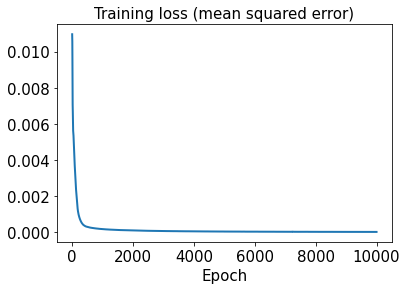

In [44]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

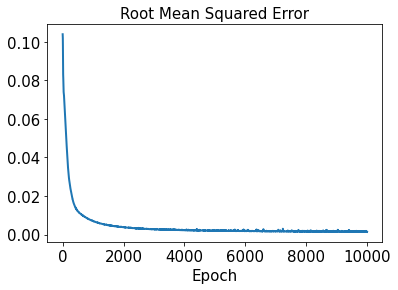

In [45]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [46]:
test_results = sd.evaluate(x_train)

5/5 [==============================] - 0s 2ms/step - loss: 2.8126e-05 - rmse: 0.0000e+00


In [47]:
decoded_train = sd.predict(decoded_sensor_train)

In [48]:
decoded_test = sd.predict(decoded_sensor_test)

In [49]:
error_train_abs = np.abs(decoded_train - y_train)

In [50]:
error_test_abs = np.abs(decoded_test - y_test)

In [51]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.82781804


In [52]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.84710145


In [53]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[1.0686662, 0.8970301, 0.84395766, 0.97949165, 0.87751627, 1.0511612, 1.0383897, 0.47854105, 0.6223138, 0.50157285, 0.5057321, 0.8834194, 0.71630436, 0.82834405, 0.6021376, 1.0246645, 0.38205275, 0.31420866, 0.71604466, 0.9031457, 0.8747669, 0.7180954, 0.830346, 0.550607, 0.93666524, 0.6521868, 1.0033017, 0.6250352, 0.42342365, 0.7170985, 0.8681513, 0.9300934, 0.25566804, 1.0880779, 0.6344155, 0.85527134, 0.82794964, 0.8142001, 0.49519163, 0.8220511, 1.0910871, 0.60629565, 1.0450805, 0.9878056, 0.49939814, 0.59298503, 0.7280444, 0.47141522, 0.3157833, 0.5262058, 0.86379635, 0.90910417, 0.5526584, 0.34543478, 0.48668498, 0.87643933, 0.9701989, 0.79193324, 0.9733647, 0.8360896, 0.54453886, 1.0919116, 1.1981299, 1.0068713, 0.8281431, 0.95755786, 1.1131629, 1.0252047, 0.85567516, 1.0996255, 0.9330297, 1.1051184, 0.6073958, 1.1633011, 0.62860185, 0.7145459, 0.9465245, 1.0776056, 0.89897406, 0.60061496, 0.9879422, 0.86681503, 1.0600251, 0.5453109, 0.38185555, 0.890975, 0.9962831, 0.9751328, 

In [54]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.6098411, 0.7663146, 0.6046084, 0.8909363, 0.9736689, 1.1200856, 0.7221939, 0.5757966, 1.0644636, 0.9015179, 1.1422774, 0.47216484, 1.0911174, 0.87743014, 0.8545509, 0.47914115, 0.9864544, 0.65689707, 0.5595493, 0.319153, 0.7388704, 0.48004964, 0.9281388, 0.93806297, 0.97918236, 0.9575058, 0.90944356, 1.0846788, 0.93345517, 0.9178424, 0.59331656, 0.58043104, 0.8203837, 0.71785295, 0.7825023, 1.1118273, 1.1171416, 1.0454501, 0.7154629, 0.91834724, 0.9789812, 0.95909137, 0.76992255, 0.8306826, 1.1105081, 1.1028583, 0.7344028, 0.61927325, 0.9228873, 0.7189877, 1.0198302, 1.0003773, 1.0419793, 0.9492489, 0.5965534, 0.6998583, 0.90497386, 1.0902946, 1.1720757, 0.48987114, 0.56553435, 0.37752843, 1.0815316, 0.7642312, 0.7998822, 0.31976673, 0.9484431]


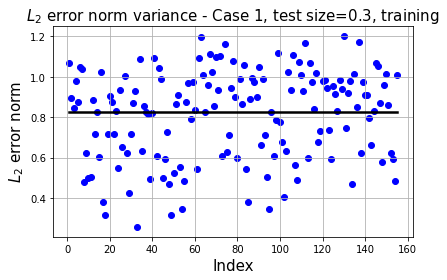

In [59]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

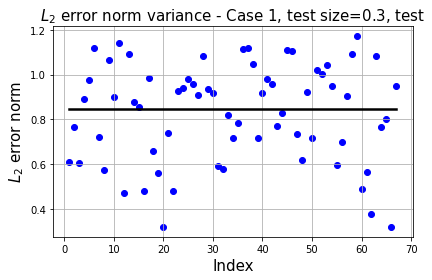

In [60]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

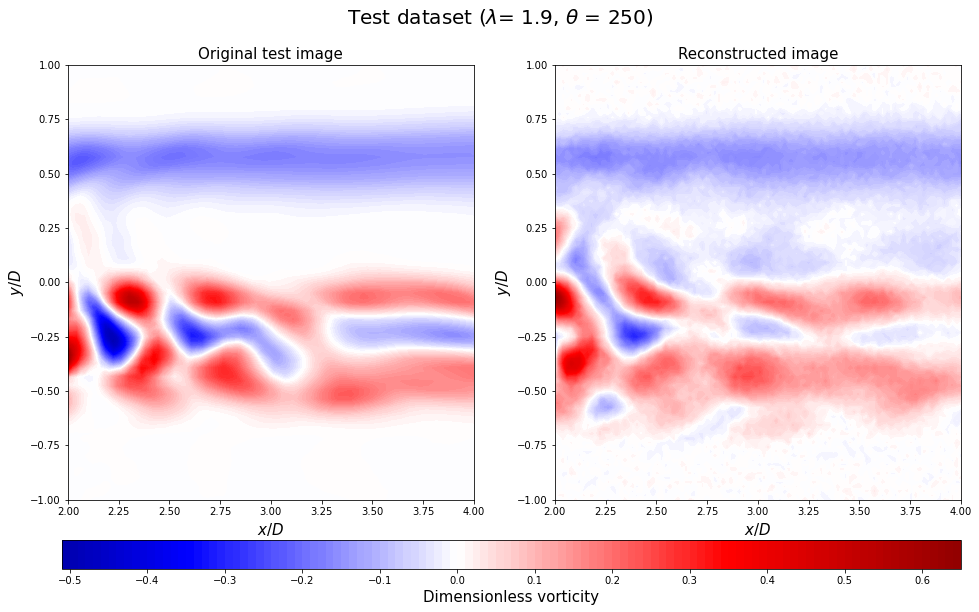

In [57]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

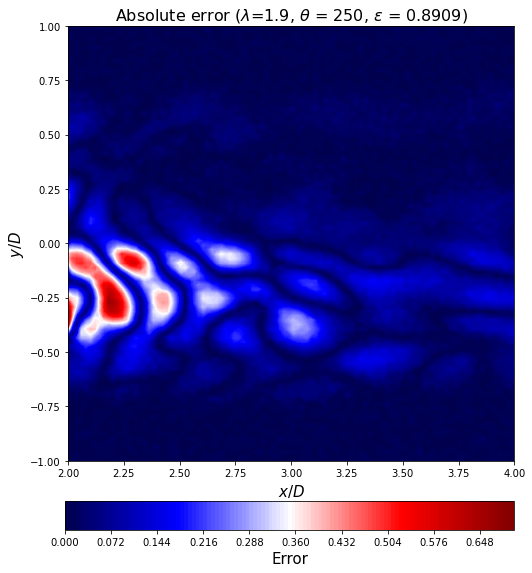

In [58]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()